************************************************************************
************************************************************************

# Exploratory data analysis of the SAIT GBT lab temperature data

- Notebook created in Google Colab for the Machine Learning/Applied Product Management bootcamps final project, December 2021
- Data received in csv files and loaded from local storage. The files received were:
  - 2021.10.07_2ndFloorEastZoneTemperature.csv 
  - 2021.10.07_CarportPVGeneration.csv 
  - 2021.10.07_HRV 1 and 2 Supply Temps.csv
  - 2021.10.07_OAT.csv
  - 2021.10.07_SolarRoof and SolarWall Temperatures.csv

************************************************************************
************************************************************************


In [2]:
# import python packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

from datetime import date

In [3]:
# chose the csv files from local directory and load into colab workspace
# (click on the "choose files" button when the cell is executed)
from google.colab import files
uploaded = files.upload()

Saving 2021.10.07_2ndFloorEastZoneTemperature.csv to 2021.10.07_2ndFloorEastZoneTemperature.csv
Saving 2021.10.07_HRV 1 and 2 Supply Temps.csv to 2021.10.07_HRV 1 and 2 Supply Temps.csv
Saving 2021.10.07_OAT.csv to 2021.10.07_OAT.csv
Saving 2021.10.07_CarportPVGeneration.csv to 2021.10.07_CarportPVGeneration.csv
Saving 2021.10.07_SolarRoof and SolarWall Temperatures.csv to 2021.10.07_SolarRoof and SolarWall Temperatures.csv


In [4]:
# read the raw data from csv files into pandas dataframes for analysis
import io

east_zone_temp_raw_df = pd.read_csv(
    io.BytesIO(uploaded['2021.10.07_2ndFloorEastZoneTemperature.csv'])
    , sep='\t') # this file used '\t' for column separator rathen than default comma
hrv_supply_temp_raw_df = pd.read_csv(
    io.BytesIO(uploaded['2021.10.07_HRV 1 and 2 Supply Temps.csv']))
oat_raw_df = pd.read_csv(
    io.BytesIO(uploaded['2021.10.07_OAT.csv']))
carport_pv_generation_raw_df = pd.read_csv(
    io.BytesIO(uploaded['2021.10.07_CarportPVGeneration.csv']))
solar_roof_wall_temp_raw_df = pd.read_csv(
    io.BytesIO(uploaded['2021.10.07_SolarRoof and SolarWall Temperatures.csv']))

---
---

## First look at the raw data 
---
---

###general look at data
- number of rows and columns in each file 
- data and data types

In [5]:
# check load; take a first look at the columns and shape of the input data
print(f'east_zone_temp_raw_df:\n {east_zone_temp_raw_df.shape[0]} rows and ' \
                    f'{east_zone_temp_raw_df.shape[1]} columns;\n ' \
                    f'available columns: {east_zone_temp_raw_df.columns.values}\n')
print(f'hrv_supply_temp_raw_df:\n {hrv_supply_temp_raw_df.shape[0]} rows and ' \
                    f'{hrv_supply_temp_raw_df.shape[1]} columns;\n ' \
                    f'available columns: {hrv_supply_temp_raw_df.columns.values}\n')
print(f'oat_raw_df:\n {oat_raw_df.shape[0]} rows and ' \
                    f'{oat_raw_df.shape[1]} columns;\n ' \
                    f'available columns: {oat_raw_df.columns.values}\n')
print(f'carport_pv_generation_raw_df:\n {carport_pv_generation_raw_df.shape[0]} rows and ' \
                    f'{carport_pv_generation_raw_df.shape[1]} columns;\n ' \
                    f'available columns: {carport_pv_generation_raw_df.columns.values}\n')
print(f'solar_roof_wall_temp_raw_df:\n {solar_roof_wall_temp_raw_df.shape[0]} rows and ' \
                    f'{solar_roof_wall_temp_raw_df.shape[1]} columns;\n ' \
                    f'available columns: {solar_roof_wall_temp_raw_df.columns.values}\n')

east_zone_temp_raw_df:
 76934 rows and 4 columns;
 available columns: ['fact_date' 'fact_time' 'read_value' 'sensor_id']

hrv_supply_temp_raw_df:
 153377 rows and 8 columns;
 available columns: ['fact_date' 'fact_time' 'read_value' 'sensor_id' 'project_id'
 'controller_id' 'measurement_properties_id' 'is_valid']

oat_raw_df:
 76684 rows and 8 columns;
 available columns: ['fact_date' 'fact_time' 'read_value' 'sensor_id' 'project_id'
 'controller_id' 'measurement_properties_id' 'is_valid']

carport_pv_generation_raw_df:
 546592 rows and 8 columns;
 available columns: ['fact_date' 'fact_time' 'read_value' 'sensor_id' 'project_id'
 'controller_id' 'measurement_properties_id' 'is_valid']

solar_roof_wall_temp_raw_df:
 61571 rows and 8 columns;
 available columns: ['fact_date' 'fact_time' 'read_value' 'sensor_id' 'project_id'
 'controller_id' 'measurement_properties_id' 'is_valid']



In [6]:
# data in east_zone_temp_raw_df
print(east_zone_temp_raw_df.dtypes)
east_zone_temp_raw_df.head()

fact_date      object
fact_time      object
read_value    float64
sensor_id       int64
dtype: object


,fact_date,fact_time,read_value,sensor_id
0,10/2/2018,18:49:28,21.621559,406
1,10/2/2018,18:59:28,21.621559,406
2,10/2/2018,19:09:28,21.621559,406
3,10/2/2018,22:09:29,21.404633,406
4,10/2/2018,22:19:29,21.406265,406


In [7]:
# data in hrv_supply_temp_raw_df
print(hrv_supply_temp_raw_df.dtypes)
hrv_supply_temp_raw_df.head()

fact_date                     object
fact_time                     object
read_value                   float64
sensor_id                      int64
project_id                     int64
controller_id                  int64
measurement_properties_id      int64
is_valid                       int64
dtype: object


,fact_date,fact_time,read_value,sensor_id,project_id,controller_id,measurement_properties_id,is_valid
0,2018-10-02,18:47:03,37.712791,427,2,5,6,1
1,2018-10-02,18:57:03,37.965393,427,2,5,6,1
2,2018-10-02,19:07:03,38.166439,427,2,5,6,1
3,2018-10-02,19:17:04,38.163002,427,2,5,6,1
4,2018-10-02,19:27:04,38.178467,427,2,5,6,1


In [8]:
# data in oat_raw_df
print(oat_raw_df.dtypes)
oat_raw_df.head()

fact_date                     object
fact_time                     object
read_value                   float64
sensor_id                      int64
project_id                     int64
controller_id                  int64
measurement_properties_id      int64
is_valid                       int64
dtype: object


,fact_date,fact_time,read_value,sensor_id,project_id,controller_id,measurement_properties_id,is_valid
0,2018-10-02,18:49:28,-1.417232,173,2,5,6,1
1,2018-10-02,18:59:28,-1.417232,173,2,5,6,1
2,2018-10-02,19:09:28,-1.873541,173,2,5,6,1
3,2018-10-02,19:19:29,-1.986704,173,2,5,6,1
4,2018-10-02,19:29:29,-1.986704,173,2,5,6,1


In [9]:
# data in carport_pv_generation_raw_df
print(carport_pv_generation_raw_df.dtypes)
carport_pv_generation_raw_df.head()

fact_date                    object
fact_time                    object
read_value                    int64
sensor_id                     int64
project_id                    int64
controller_id                 int64
measurement_properties_id     int64
is_valid                      int64
dtype: object


,fact_date,fact_time,read_value,sensor_id,project_id,controller_id,measurement_properties_id,is_valid
0,2019-02-15,16:14:00,45,469,2,4,59,1
1,2019-02-15,16:15:00,44,469,2,4,59,1
2,2019-02-15,16:16:00,43,469,2,4,59,1
3,2019-02-15,16:17:00,44,469,2,4,59,1
4,2019-02-15,16:18:00,42,469,2,4,59,1


In [10]:
# data in solar_roof_wall_temp_raw_df
print(solar_roof_wall_temp_raw_df.dtypes)
solar_roof_wall_temp_raw_df.head()

fact_date                     object
fact_time                     object
read_value                   float64
sensor_id                      int64
project_id                     int64
controller_id                  int64
measurement_properties_id      int64
is_valid                       int64
dtype: object


,fact_date,fact_time,read_value,sensor_id,project_id,controller_id,measurement_properties_id,is_valid
0,2018-08-31,05:00:00,10.513422,146,2,4,6,1
1,2018-09-20,23:00:00,9.330368,146,2,4,6,1
2,2018-10-11,14:30:00,34.545948,146,2,4,6,1
3,2018-11-03,01:00:00,4.088793,146,2,4,6,1
4,2018-11-03,01:30:00,3.785206,146,2,4,6,1


---

###**NOTES:**

1. read_value column contains the sensor data

2. Target data: **2nd_floor_east_zone temperature**
  - less columns (no project/controller/measurement_properties_id/is_valid)

3. Combine fact_date and fact_time to get the timestamp for the measurements (also make sure data type is datetime)
  - at first look, from head() calls, it seems that we have:
    - 10-minute interval for 2nd floor and oat and hrv datasets, 
    - 1-minute interval for carport data, and 
    - 30-minute interval for solar roof data


4. **DETERMINE**
  - how unique are the values outside of date/time and read_value columns?
  - are there duplicates in the files (timestamps) - what is the distribution of values, any outliers

************************************************************************
************************************************************************

---
### unique values in columns
- particularly sensor_id, but also the 4 columns missing from the target data file
  - note: if there are any missing values in the column, pandas unique would print it out as NaN
---

In [11]:
# unique values in sensor_id column of each file
print('east_zone_temp_raw_df: ', east_zone_temp_raw_df.sensor_id.unique())
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.sensor_id.unique())
print('\noat_raw_df: ', oat_raw_df.sensor_id.unique())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.sensor_id.unique())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.sensor_id.unique())

east_zone_temp_raw_df:  [406]

hrv_supply_temp_raw_df:  [427 466]

oat_raw_df:  [173]

carport_pv_generation_raw_df:  [469]

solar_roof_wall_temp_raw_df:  [146 185]


In [12]:
# when more than one sensor in the file, how many measurements of each
# to_frame() call only used to get the "tabular" display in the print statement
print('hrv_supply_temp_raw_df: \n', hrv_supply_temp_raw_df.sensor_id.value_counts(dropna=False).to_frame().reset_index()
                                              .to_string(index=False, header=['sensor_id','count']))
print('\nsolar_roof_wall_temp_raw_df: \n', solar_roof_wall_temp_raw_df.sensor_id.value_counts(dropna=False).to_frame().reset_index()
                                              .to_string(index=False, header=['sensor_id','count']))
# looks evenly split - the file probably contains same timestamps for each sensor

hrv_supply_temp_raw_df: 
 sensor_id  count
      427  76689
      466  76688

solar_roof_wall_temp_raw_df: 
 sensor_id  count
      185  30786
      146  30785


In [13]:
# unique values in *is_valid* in each file
print('east_zone_temp_raw_df: no is_valid column')
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.is_valid.unique())
print('\noat_raw_df: ', oat_raw_df.is_valid.unique())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.is_valid.unique())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.is_valid.unique())
# looks like all of them are 1, probably already filtered by Tyler - remove the column from dataset

east_zone_temp_raw_df: no is_valid column

hrv_supply_temp_raw_df:  [1]

oat_raw_df:  [1]

carport_pv_generation_raw_df:  [1]

solar_roof_wall_temp_raw_df:  [1]


In [14]:
# unique values in *project_id* in each file
print('east_zone_temp_raw_df: no project_id column')
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.project_id.unique())
print('\noat_raw_df: ', oat_raw_df.project_id.unique())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.project_id.unique())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.project_id.unique())
# looks like project_id is always 2 - remove column

east_zone_temp_raw_df: no project_id column

hrv_supply_temp_raw_df:  [2]

oat_raw_df:  [2]

carport_pv_generation_raw_df:  [2]

solar_roof_wall_temp_raw_df:  [2]


In [15]:
# unique values in *controller_id* in each file
print('east_zone_temp_raw_df: no controller_id column')
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.controller_id.unique())
print('\noat_raw_df: ', oat_raw_df.controller_id.unique())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.controller_id.unique())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.controller_id.unique())
# two different values, but unique per file/sensor, so safe to remove the column

east_zone_temp_raw_df: no controller_id column

hrv_supply_temp_raw_df:  [5]

oat_raw_df:  [5]

carport_pv_generation_raw_df:  [4]

solar_roof_wall_temp_raw_df:  [4]


In [16]:
# unique values in *measurement_properties_id* in each file
print('east_zone_temp_raw_df: no measurement_properties_id column')
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.measurement_properties_id.unique())
print('\noat_raw_df: ', oat_raw_df.measurement_properties_id.unique())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.measurement_properties_id.unique())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.measurement_properties_id.unique())
# measurement properties different, but unique per file (denotes units, deg C for temp and W for power generation data)
# safe to remove column

east_zone_temp_raw_df: no measurement_properties_id column

hrv_supply_temp_raw_df:  [6]

oat_raw_df:  [6]

carport_pv_generation_raw_df:  [59]

solar_roof_wall_temp_raw_df:  [6]


In [17]:
# check for any NaN in the read_value column
print('east_zone_temp_raw_df: ', east_zone_temp_raw_df.read_value.isnull().values.any())
print('\nhrv_supply_temp_raw_df: ', hrv_supply_temp_raw_df.read_value.isnull().values.any())
print('\noat_raw_df: ', oat_raw_df.read_value.isnull().values.any())
print('\ncarport_pv_generation_raw_df: ', carport_pv_generation_raw_df.read_value.isnull().values.any())
print('\nsolar_roof_wall_temp_raw_df: ', solar_roof_wall_temp_raw_df.read_value.isnull().values.any())
# False across input files

east_zone_temp_raw_df:  False

hrv_supply_temp_raw_df:  False

oat_raw_df:  False

carport_pv_generation_raw_df:  False

solar_roof_wall_temp_raw_df:  False


---

### Re-arrange input dataframes
- combine fact_date and fact_time into one column, fact_datetime
- drop all columns except read_value and sensor_id
- save as a separate dataframe for each of the input files

---

In [18]:
east_zone_temp_df = pd.DataFrame({
    'fact_datetime': pd.to_datetime(east_zone_temp_raw_df['fact_date'] + 
                                                        ' ' + east_zone_temp_raw_df['fact_time']), 
    'sensor_id': east_zone_temp_raw_df['sensor_id'],
    'read_value': east_zone_temp_raw_df['read_value']                              
})
east_zone_temp_df.head()

,fact_datetime,sensor_id,read_value
0,2018-10-02 18:49:28,406,21.621559
1,2018-10-02 18:59:28,406,21.621559
2,2018-10-02 19:09:28,406,21.621559
3,2018-10-02 22:09:29,406,21.404633
4,2018-10-02 22:19:29,406,21.406265


In [19]:
hrv_supply_temp_df = pd.DataFrame({
    'fact_datetime': pd.to_datetime(hrv_supply_temp_raw_df['fact_date'] + 
                                                        ' ' + hrv_supply_temp_raw_df['fact_time']), 
    'sensor_id': hrv_supply_temp_raw_df['sensor_id'],
    'read_value': hrv_supply_temp_raw_df['read_value']                              
})
hrv_supply_temp_df.head()

,fact_datetime,sensor_id,read_value
0,2018-10-02 18:47:03,427,37.712791
1,2018-10-02 18:57:03,427,37.965393
2,2018-10-02 19:07:03,427,38.166439
3,2018-10-02 19:17:04,427,38.163002
4,2018-10-02 19:27:04,427,38.178467


In [20]:
oat_df = pd.DataFrame({
    'fact_datetime': pd.to_datetime(oat_raw_df['fact_date'] + ' ' + oat_raw_df['fact_time']), 
    'sensor_id': oat_raw_df['sensor_id'],
    'read_value': oat_raw_df['read_value']                              
})
oat_df.head()

,fact_datetime,sensor_id,read_value
0,2018-10-02 18:49:28,173,-1.417232
1,2018-10-02 18:59:28,173,-1.417232
2,2018-10-02 19:09:28,173,-1.873541
3,2018-10-02 19:19:29,173,-1.986704
4,2018-10-02 19:29:29,173,-1.986704


In [21]:
carport_pv_generation_df = pd.DataFrame({
    'fact_datetime': pd.to_datetime(carport_pv_generation_raw_df['fact_date'] + 
                                                        ' ' + carport_pv_generation_raw_df['fact_time']), 
    'sensor_id': carport_pv_generation_raw_df['sensor_id'],
    'read_value': carport_pv_generation_raw_df['read_value']                              
})
carport_pv_generation_df.head()

,fact_datetime,sensor_id,read_value
0,2019-02-15 16:14:00,469,45
1,2019-02-15 16:15:00,469,44
2,2019-02-15 16:16:00,469,43
3,2019-02-15 16:17:00,469,44
4,2019-02-15 16:18:00,469,42


In [22]:
solar_roof_wall_temp_df = pd.DataFrame({
    'fact_datetime': pd.to_datetime(solar_roof_wall_temp_raw_df['fact_date'] + 
                                                        ' ' + solar_roof_wall_temp_raw_df['fact_time']), 
    'sensor_id': solar_roof_wall_temp_raw_df['sensor_id'],
    'read_value': solar_roof_wall_temp_raw_df['read_value']                              
})
solar_roof_wall_temp_df.head()

,fact_datetime,sensor_id,read_value
0,2018-08-31 05:00:00,146,10.513422
1,2018-09-20 23:00:00,146,9.330368
2,2018-10-11 14:30:00,146,34.545948
3,2018-11-03 01:00:00,146,4.088793
4,2018-11-03 01:30:00,146,3.785206


---

### check date ranges of the input data
-  min/max values are for both sensors in case of multiple sensors

---

In [23]:
# start date for each of the dataframes
print(f'east_zone_temp date/time range:\n{east_zone_temp_df.fact_datetime.min()} to {east_zone_temp_df.fact_datetime.max()}')
print(f'hrv_supply_temp date/time range:\n{hrv_supply_temp_df.fact_datetime.min()} to {hrv_supply_temp_df.fact_datetime.max()}')
print(f'oat date/time range:\n{oat_df.fact_datetime.min()} to {oat_df.fact_datetime.max()}')
print(f'carport_pv_generation date/time range:\n{carport_pv_generation_df.fact_datetime.min()} to {carport_pv_generation_df.fact_datetime.max()}')
print(f'solar_roof_wall_temp date/time range:\n{solar_roof_wall_temp_df.fact_datetime.min()} to {solar_roof_wall_temp_df.fact_datetime.max()}')

east_zone_temp date/time range:
2018-10-02 18:49:28 to 2020-11-08 03:49:40
hrv_supply_temp date/time range:
2018-10-02 18:47:03 to 2020-11-08 03:49:40
oat date/time range:
2018-10-02 18:49:28 to 2020-11-08 03:49:40
carport_pv_generation date/time range:
2019-02-15 16:14:00 to 2020-11-08 03:54:00
solar_roof_wall_temp date/time range:
2018-08-31 05:00:00 to 2020-11-08 04:00:00


In [24]:
# min/max values in each data set (both sensors in case of multiple sensors)
print('east_zone_temp min/max values: ', east_zone_temp_df.read_value.min(), ' / ', east_zone_temp_df.read_value.max())
print('hrv_supply_temp min/max values: ', hrv_supply_temp_df.read_value.min(), ' / ', hrv_supply_temp_df.read_value.max())
print('oat_temp min/max values: ', oat_df.read_value.min(), ' / ', oat_df.read_value.max())
print('carport min/max values: ', carport_pv_generation_df.read_value.min(), ' / ', carport_pv_generation_df.read_value.max())
print('solar wall/roof min/max values: ', solar_roof_wall_temp_df.read_value.min(), ' / ', solar_roof_wall_temp_df.read_value.max())
print()

east_zone_temp min/max values:  15.7011414  /  29.376480100000002
hrv_supply_temp min/max values:  11.3363456726  /  51.7311019897
oat_temp min/max values:  -31.815856933600003  /  36.3295173645
carport min/max values:  -50  /  15391
solar wall/roof min/max values:  -28.873292923  /  57.083518999999995



In [25]:
# make sure read_value is saved as a float - it was coming up as float in dtypes already, but just to be sure
east_zone_temp_df.read_value = east_zone_temp_df.read_value.astype(float)
hrv_supply_temp_df.read_value = hrv_supply_temp_df.read_value.astype(float)
oat_df.read_value = oat_df.read_value.astype(float)
carport_pv_generation_df.read_value = carport_pv_generation_df.read_value.astype(float)
solar_roof_wall_temp_df.read_value = solar_roof_wall_temp_df.read_value.astype(float)

---

###**NOTES:**

1. no NaN values in csv files

2. sensor_id - **7 different sensors**
- Sensor 406 records the overal temperature in the 2nd floor lab
- Sensors for other data
  - 173 - outside air temperature, north side of the building (no sun) 
  - 185 - solar roof temperature 
  - 146 - solar wall temperature 
  - 427 - heat supplied to the north side of the building 
  - 466 - heat supplied to the south side of the building 
  - 469 - power generation from the carport solar panels 

3. other columns in the 4 csv files: -- **safe to remove from dataset**
  - is_valid is always 1  (probably filtered before being shared with us)
  - project_id is always 2 
  - controller_id is 4 or 5 (unique per file though) - **ask for meaning**
  - measurement_properties_id is 6 for all except carport data, 59 - **units of carport data is watts; all other data is deg C**

4. **DETERMINE**
  - check for duplicates in the files, distribution of values/outliers
  - Sort and make the plots of data to see continuity in time
    - fact_datetime is the index in each of the separate files
      - add sensor_id to the index because hrv and solar datasets have 2 sensors in their input data files
    - also, sort index to make sure that the time data is consecutive and without gaps

---
---

---
## **TARGET DATA PLOTS**
- have a visual look at the distribution of target data
  - both in time and statistically

In [26]:
# set index to timestamp + sensor id (to be consistent across all dataframes)
east_zone_temp_df = east_zone_temp_df.set_index(['fact_datetime', 'sensor_id']).sort_index()
east_zone_temp_df.head()

,,read_value
fact_datetime,sensor_id,
2018-10-02 18:49:28,406,21.621559
2018-10-02 18:59:28,406,21.621559
2018-10-02 19:09:28,406,21.621559
2018-10-02 19:19:29,406,21.600716
2018-10-02 19:29:29,406,21.590544


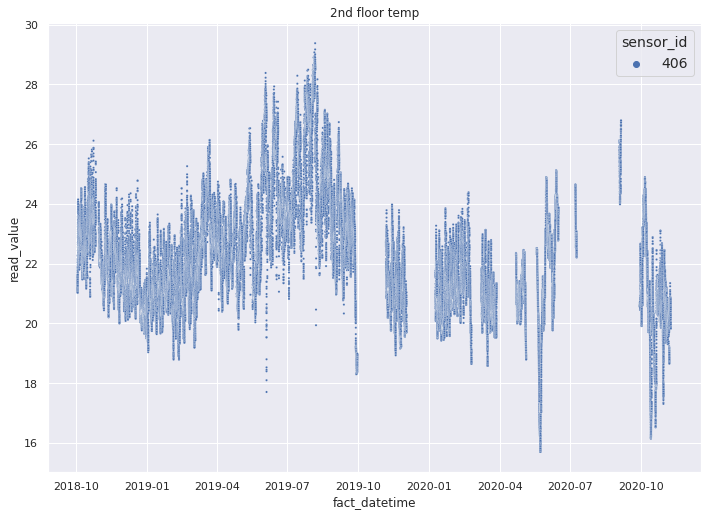

In [27]:
# plot the sensor reading data versus time
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=east_zone_temp_df.reset_index(), 
                palette=['b'], s=5).set_title('2nd floor temp')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [28]:
# can see large gaps in data on the plot; quantify the length of gaps
east_zone_temp_df['fact_datetime'] = east_zone_temp_df.index.get_level_values(0)  # add column to copy index data
# difference between consecutive rows in the dataframe
east_zone_temp_df['delta_fact_datetime'] = east_zone_temp_df['fact_datetime'].diff().astype('timedelta64[m]')
# print out the difference between consecutive rows, together with how many times the difference occurs
print('time between consecutive data points in east_zone_temp_df:\n')
print(east_zone_temp_df.delta_fact_datetime.value_counts(dropna=False).to_frame().reset_index()
                                              .to_string(index=False, header=['time (minutes)','count']))

time between consecutive data points in east_zone_temp_df:

time (minutes)  count
          10.0  73677
           9.0   3232
           0.0      8
          70.0      2
       79724.0      1
           8.0      1
        5300.0      1
        1340.0      1
       34701.0      1
       17800.0      1
       36061.0      1
       19771.0      1
         830.0      1
       53352.0      1
       53842.0      1
          20.0      1
        1444.0      1
       31551.0      1
           NaN      1


In [29]:
# mostly 10 and 9 minutes, but a number of big gaps too, for example 79k minutes is about 55 days!
# the NaN value in time difference is the first row, no previous value to calculate from
# (counted because of the dropna=False option in value_counts)

# values where fact_datetime difference is 0 - possible duplicates?
print(east_zone_temp_df[east_zone_temp_df['delta_fact_datetime']==0])

                               read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2018-11-04 01:31:55 406         21.242159  ...                 0.0
2018-11-04 01:41:55 406         21.246325  ...                 0.0
2018-11-04 01:51:55 406         21.216520  ...                 0.0
2020-11-01 01:09:08 406         20.370773  ...                 0.0
2020-11-01 01:19:08 406         20.391619  ...                 0.0
2020-11-01 01:39:08 406         20.391619  ...                 0.0
2020-11-01 01:49:08 406         20.391619  ...                 0.0
2020-11-01 01:59:08 406         20.391619  ...                 0.0

[8 rows x 3 columns]


In [30]:
# looks like these occured Nov 4 2018 and Nov 1 2020, print out a few of those rows
east_zone_temp_df[(east_zone_temp_df['fact_datetime'] >= pd.Timestamp('2018-11-04 01:20:00')) & 
                  (east_zone_temp_df['fact_datetime'] <= pd.Timestamp('2018-11-04 01:55:00'))]

,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2018-11-04 01:21:54,406,21.246325,2018-11-04 01:21:54,10.0
2018-11-04 01:31:54,406,21.249823,2018-11-04 01:31:54,10.0
2018-11-04 01:31:55,406,21.242159,2018-11-04 01:31:55,0.0
2018-11-04 01:41:54,406,21.246325,2018-11-04 01:41:54,9.0
2018-11-04 01:41:55,406,21.246325,2018-11-04 01:41:55,0.0
2018-11-04 01:51:54,406,21.265869,2018-11-04 01:51:54,9.0
2018-11-04 01:51:55,406,21.216520,2018-11-04 01:51:55,0.0


In [31]:
# looks like what is happening is that there are multiple readings seconds apart 
# so these are not duplicates and these readings will be averaged into one read_value in the sampling window
# when the dataframe is resampled

# also print out the time difference in days (instead of minutes like above)
print(east_zone_temp_df['fact_datetime'].diff().astype('timedelta64[D]').value_counts()) # time gaps in days 
# see when gaps were larger than 10 days (delta_fact_datetime in minutes)
east_zone_temp_df[(east_zone_temp_df.delta_fact_datetime >=14400)] 

0.0     76923
37.0        2
21.0        1
55.0        1
24.0        1
12.0        1
1.0         1
13.0        1
3.0         1
25.0        1
Name: fact_datetime, dtype: int64


,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2019-11-05 18:38:59,406,22.758911,2019-11-05 18:38:59,53352.0
2020-01-08 19:03:47,406,21.767488,2020-01-08 19:03:47,53842.0
2020-03-07 18:02:57,406,21.267172,2020-03-07 18:02:57,17800.0
2020-04-21 22:06:19,406,22.356237,2020-04-21 22:06:19,36061.0
2020-05-18 17:08:18,406,22.309500,2020-05-18 17:08:18,19771.0
2020-07-07 17:22:02,406,24.644316,2020-07-07 17:22:02,31551.0
2020-09-02 19:36:23,406,26.134348,2020-09-02 19:36:23,79724.0
2020-09-28 19:08:20,406,20.641777,2020-09-28 19:08:20,34701.0


In [32]:
# pick one of the times above and print out a few lines before and after just to see
east_zone_temp_df[(east_zone_temp_df['fact_datetime'] > pd.Timestamp('2020-06-15 19:00:00')) & 
                  (east_zone_temp_df['fact_datetime'] <= pd.Timestamp('2020-07-31'))].head(8)

,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2020-06-15 19:00:23,406,23.872992,2020-06-15 19:00:23,10.0
2020-06-15 19:10:22,406,23.872992,2020-06-15 19:10:22,9.0
2020-06-15 19:20:22,406,23.872992,2020-06-15 19:20:22,10.0
2020-06-15 19:30:22,406,23.865484,2020-06-15 19:30:22,10.0
2020-07-07 17:22:02,406,24.644316,2020-07-07 17:22:02,31551.0
2020-07-07 17:32:02,406,24.623468,2020-07-07 17:32:02,10.0
2020-07-07 17:42:02,406,24.644316,2020-07-07 17:42:02,10.0
2020-07-07 17:52:02,406,24.611160,2020-07-07 17:52:02,10.0


east_zone_temp descriptive statistics:
count    76934.000000
mean        22.301944
std          1.916853
min         15.701141
25%         20.971151
50%         22.070855
75%         23.409340
max         29.376480
Name: read_value, dtype: float64


east_zone_temp boxplot and histogram of values:


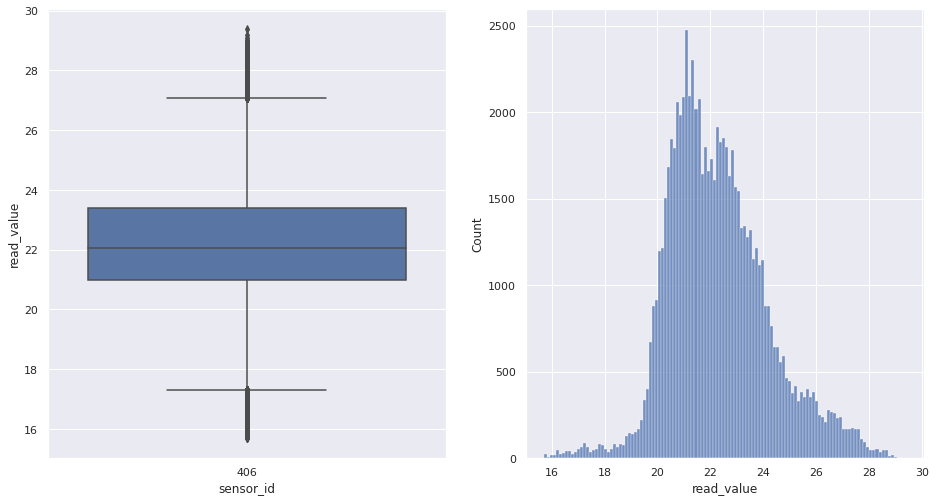

In [33]:
# also look at the statistical distribution of read_value values in the target data
print('east_zone_temp descriptive statistics:')
print(east_zone_temp_df['read_value'].describe())

print('\n\neast_zone_temp boxplot and histogram of values:')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15.7,8.27))
sns.boxplot(x='sensor_id', y='read_value', data=east_zone_temp_df['read_value'].reset_index(), ax=ax[0])
sns.histplot(x='read_value', data=east_zone_temp_df['read_value'].reset_index(),  ax=ax[1])

In [34]:
# boxplot shows a number of statistical outliers
# number of outliers
Q1 = east_zone_temp_df.read_value.quantile(0.25)
Q3 = east_zone_temp_df.read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((east_zone_temp_df.read_value < (Q1 - 1.5 * IQR)) | (east_zone_temp_df.read_value > (Q3 + 1.5 * IQR))).sum()

print(f'num outliers: {num_outliers} out of {len(east_zone_temp_df)} data points; {round(100*num_outliers/len(east_zone_temp_df))}% of data')

num outliers: 2038 out of 76934 data points; 3% of data


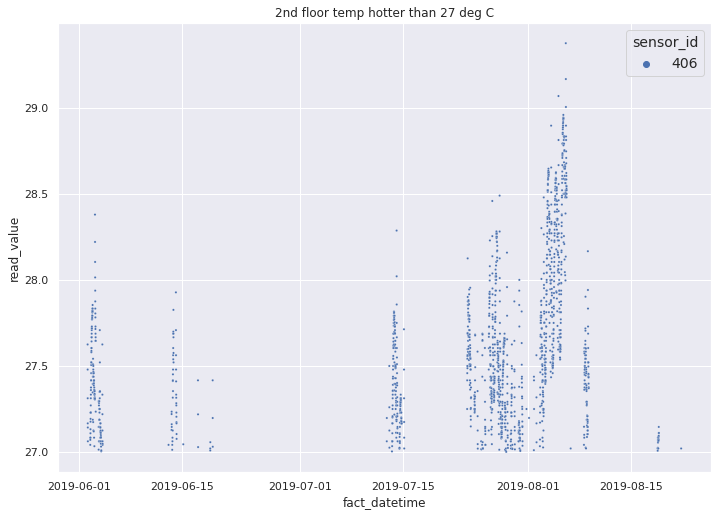

In [35]:
# plot to see if the outliers are earlier in the data or later (or evenly distributed)?
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=east_zone_temp_df[east_zone_temp_df.read_value >= 27], 
                palette=['b'], s=5).set_title('2nd floor temp hotter than 27 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

# lots of missing data in summer 2020, so could be a bit skewed
# but it does look valid, as the really high temperatures happen in summer time (June to August)

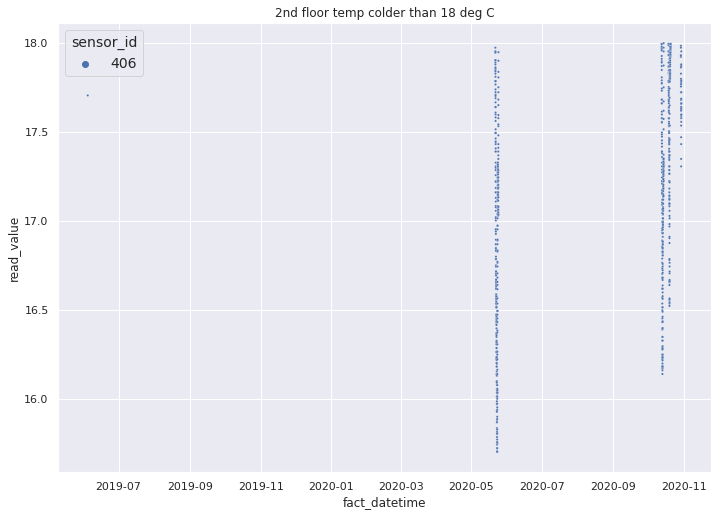

In [36]:
# what about the lower temperatures?
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=east_zone_temp_df[east_zone_temp_df.read_value <= 18], 
                palette=['b'], s=5).set_title('2nd floor temp colder than 18 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

# hmm, these seem to have happened on just a few occasions - possibly real outliers? 
# (e.g. something (outside of what the sensors recorded) happened in the building to cause the temperature drop)

In [37]:
# check which days the low temperatures occured on
print(east_zone_temp_df[(east_zone_temp_df.read_value <=18)]['fact_datetime'].dt.date.unique())

[datetime.date(2019, 6, 4) datetime.date(2020, 5, 21)
 datetime.date(2020, 5, 22) datetime.date(2020, 5, 23)
 datetime.date(2020, 5, 24) datetime.date(2020, 10, 12)
 datetime.date(2020, 10, 13) datetime.date(2020, 10, 14)
 datetime.date(2020, 10, 18) datetime.date(2020, 10, 19)
 datetime.date(2020, 10, 20) datetime.date(2020, 10, 29)]


--- 
## **INPUTS DATA PLOTS**
- apply the analysis above to each of the other dataframes

### HRV INPUT

this is the temperature of the air supplied into the building

In [38]:
# set and sort index 
hrv_supply_temp_df = hrv_supply_temp_df.set_index(['fact_datetime', 'sensor_id']).sort_index()
hrv_supply_temp_df.head()

,,read_value
fact_datetime,sensor_id,
2018-10-02 18:47:03,427,37.712791
2018-10-02 18:47:09,466,37.657806
2018-10-02 18:57:03,427,37.965393
2018-10-02 18:57:09,466,37.784966
2018-10-02 19:07:03,427,38.166439


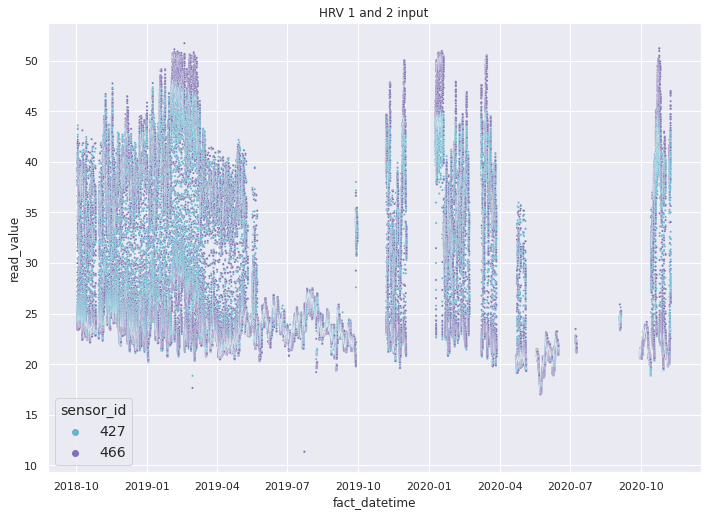

In [39]:
# plot the distribution of data over time, for each of the sensors
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=hrv_supply_temp_df.reset_index(), 
                palette=['c','m'], s=5).set_title('HRV 1 and 2 input')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [40]:
# Looks like heat generated in winter and no heat added (shows regular room temp) in summer months? 
# should ask Tyler to describe operation and where the sensors are placed 

# quantify the gaps in data, in minutes
hrv_supply_temp_df['fact_datetime'] = hrv_supply_temp_df.index.get_level_values(0)
hrv_supply_temp_df['delta_fact_datetime'] = hrv_supply_temp_df['fact_datetime'].groupby(level=1).diff().astype('timedelta64[m]')
# print out the difference between consecutive rows, together with how many times the difference occurs
print('time between consecutive data points in hrv_supply_temp_df:\n')
print(hrv_supply_temp_df.delta_fact_datetime.value_counts(dropna=False).to_frame().reset_index()
                                            .to_string(index=False, header=['time (minutes)','count']))

time between consecutive data points in hrv_supply_temp_df:

time (minutes)   count
          10.0  146940
           9.0    6387
           0.0      18
          70.0       4
       31541.0       2
          22.0       2
       34701.0       2
       36071.0       2
         840.0       2
       53842.0       2
       19771.0       2
       79724.0       2
           8.0       2
        1340.0       2
       21695.0       2
           NaN       2
       53362.0       1
       53342.0       1
        5290.0       1
        5300.0       1


In [41]:
# two NaN counts because there are 2 sensor_id values now
hrv_supply_temp_df.head(6)

,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2018-10-02 18:47:03,427,37.712791,2018-10-02 18:47:03,NaN
2018-10-02 18:47:09,466,37.657806,2018-10-02 18:47:09,NaN
2018-10-02 18:57:03,427,37.965393,2018-10-02 18:57:03,10.0
2018-10-02 18:57:09,466,37.784966,2018-10-02 18:57:09,10.0
2018-10-02 19:07:03,427,38.166439,2018-10-02 19:07:03,10.0
2018-10-02 19:07:09,466,38.193935,2018-10-02 19:07:09,10.0


In [42]:
# print the difference in days, is it the same as for target data?
print(hrv_supply_temp_df['fact_datetime'].groupby(level=1).diff().astype('timedelta64[D]').value_counts()) 
# gaps larger than 10 days (delta_fact_datetime in minutes)
hrv_supply_temp_df[(hrv_supply_temp_df.delta_fact_datetime >=14400)] 

0.0     153357
37.0         4
24.0         2
15.0         2
21.0         2
55.0         2
13.0         2
3.0          2
25.0         2
Name: fact_datetime, dtype: int64


read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2019-11-05 18:38:59 427         39.843555  ...             53342.0
                    466         40.040665  ...             53362.0
2020-01-08 19:03:47 427         41.138794  ...             53842.0
                    466         41.375828  ...             53842.0
2020-03-07 17:42:56 427         39.625324  ...             21695.0
                    466         41.359161  ...             21695.0
2020-04-21 21:56:19 427         20.785070  ...             36071.0
                    466         20.843412  ...             36071.0
2020-05-18 17:08:17 427         21.274258  ...             19771.0
                    466         21.461252  ...             19771.0
2020-07-07 17:12:02 427         22.741817  ...             31541.0
                    466         22.496475  ...             31541.0
2020-09-02 19:36:23 427         24.676121  ...             79724.0
                    466         24.492113  ...             79724.0
2020-09-28 19:08:20 427         21.150089  ...             34701.0
                    466         21.200956  ...             34701.0

[16 rows x 3 columns]

In [43]:
# pick one of the times above and print out a few lines before and after just to see
hrv_supply_temp_df[(hrv_supply_temp_df['fact_datetime'] >= pd.Timestamp('2019-09-29 17:00:00')) & 
                   (hrv_supply_temp_df['fact_datetime'] <= pd.Timestamp('2019-11-05 18:40:00'))].head(10)

read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2019-09-29 17:06:12 427         32.119072  ...                10.0
                    466         32.159481  ...                10.0
2019-09-29 17:16:12 427         32.233841  ...                10.0
                    466         32.165947  ...                10.0
2019-09-29 17:26:12 427         33.746807  ...                10.0
2019-09-29 17:36:12 427         33.425140  ...                10.0
2019-11-05 18:38:59 427         39.843555  ...             53342.0
                    466         40.040665  ...             53362.0

[8 rows x 3 columns]

hrv_supply_temp descriptive statistics:

sensor_id = 427:
 count    76689.000000
mean        28.700625
std          7.809589
min         11.371087
25%         22.770241
50%         24.622265
75%         35.638737
max         48.688107
Name: read_value, dtype: float64

sensor_id = 466:
 count    76688.000000
mean        28.907365
std          8.424182
min         11.336346
25%         22.764256
50%         24.578882
75%         35.594485
max         51.731102
Name: read_value, dtype: float64


hrv_supply_temp boxplot and histogram of values:


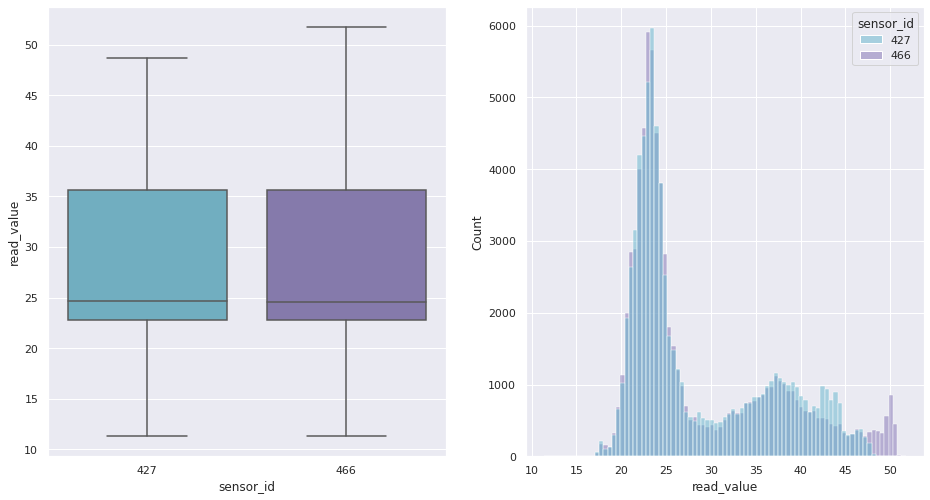

In [44]:
# look at the statistical distribution of read_value values in the hrv input data 
# (two sensors, 427 - air supplied to north side of the building; 466 - air supplied to south side of the building)
print('hrv_supply_temp descriptive statistics:\n')
print('sensor_id = 427:\n',hrv_supply_temp_df['read_value'].xs(427,level='sensor_id').describe())
print('\nsensor_id = 466:\n',hrv_supply_temp_df['read_value'].xs(466,level='sensor_id').describe())

print('\n\nhrv_supply_temp boxplot and histogram of values:')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15.7,8.27))
sns.boxplot(x='sensor_id', y='read_value', data=hrv_supply_temp_df['read_value'].reset_index(), 
            palette=['c','m'], ax=ax[0])
sns.histplot(x='read_value', data=hrv_supply_temp_df['read_value'].reset_index(), hue='sensor_id', 
             palette=['c','m'], ax=ax[1])

In [45]:
# looks like there are no statistical outliers in these 2 inputs
# pretty similar distribution - make sense because it is hot air pushed from the same source to different 
# sides of the building (possibly different length of path?)
# one large peak and couple smaller ones in the histogram - unknown meaning
# sensor 427
Q1 = hrv_supply_temp_df.xs(427, level=1).read_value.quantile(0.25)
Q3 = hrv_supply_temp_df.xs(427, level=1).read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((hrv_supply_temp_df.xs(427, level=1).read_value < (Q1 - 1.5 * IQR)) | 
                (hrv_supply_temp_df.xs(427, level=1).read_value > (Q3 + 1.5 * IQR))).sum()
print(f'num outliers, 427: {num_outliers} out of {len(hrv_supply_temp_df.xs(427, level=1))} data points;' \
      + f'{round(100*num_outliers/len(hrv_supply_temp_df.xs(427, level=1)))}% of data')

# sensor 466
Q1 = hrv_supply_temp_df.xs(466, level=1).read_value.quantile(0.25)
Q3 = hrv_supply_temp_df.xs(466, level=1).read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((hrv_supply_temp_df.xs(466, level=1).read_value < (Q1 - 1.5 * IQR)) | 
                (hrv_supply_temp_df.xs(466, level=1).read_value > (Q3 + 1.5 * IQR))).sum()
print(f'\nnum outliers, 466: {num_outliers} out of {len(hrv_supply_temp_df.xs(466, level=1))} data points;' \
      + f' {round(100*num_outliers/len(hrv_supply_temp_df.xs(466, level=1)))}% of data')

num outliers, 427: 0 out of 76689 data points;0% of data

num outliers, 466: 0 out of 76688 data points; 0% of data


min temperature occured on:
[datetime.date(2019, 7, 23)]





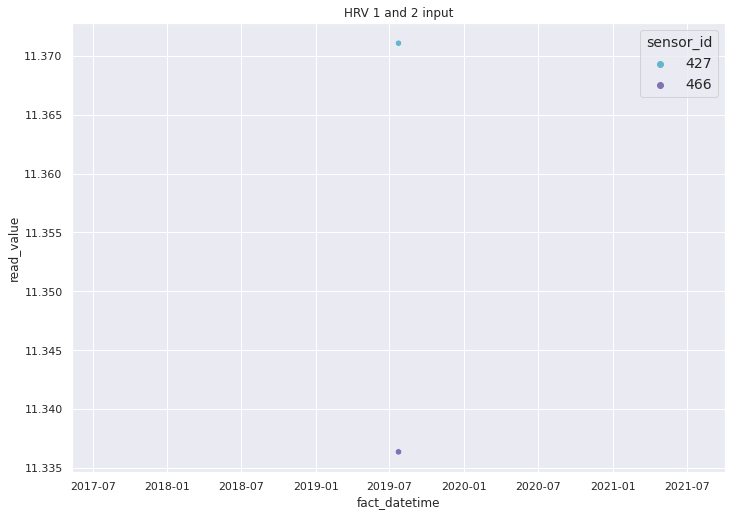

In [46]:
# from Tyler's email (Nov 29th):
# The heat is coming from copper tubes that are run through each duct as it leaves the HRV. 
# Both HRV’s are receiving heat from the same source, although, each HRV has a valve that modulates how much heat 
# gets passed through the copper tubes which then heats the air being supplied to either the north or south side of building.
# At one point we were testing a new mechanical system that was meant to cool the building and that is where you see the 11C minimum.
# This is an outlier. 52C seems normal.

# take a look at what happens around 11 deg C data point
# check which days the low temperatures occured on
print('min temperature occured on:')
print(hrv_supply_temp_df[(hrv_supply_temp_df.read_value <=15)]['fact_datetime'].dt.date.unique())

print('\n\n')
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=hrv_supply_temp_df[(hrv_supply_temp_df.read_value <=15)], 
                palette=['c','m'], s=40).set_title('HRV 1 and 2 input')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [47]:
# this data point should be removed then and replaced by a mean value of the data points around it (part of future work then)
hrv_supply_temp_df[(hrv_supply_temp_df['fact_datetime'] >= pd.Timestamp('2019-07-23 07:00:00')) & 
                   (hrv_supply_temp_df['fact_datetime'] <= pd.Timestamp('2019-07-23 08:00:00'))]
# couple missing data points there too!

read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2019-07-23 07:08:15 427         23.349186  ...                10.0
2019-07-23 07:08:21 466         23.241472  ...                10.0
2019-07-23 07:31:01 427         11.371087  ...                22.0
                    466         11.336346  ...                22.0
2019-07-23 07:41:01 427         23.341705  ...                10.0
                    466         23.341705  ...                10.0
2019-07-23 07:51:01 427         23.355169  ...                10.0
                    466         23.388081  ...                10.0

[8 rows x 3 columns]

### OAT INPUT

this is the outside air temperature

In [48]:
# repeat same steps as above, set and sort index
oat_df = oat_df.set_index(['fact_datetime', 'sensor_id']).sort_index()
oat_df.head()

,,read_value
fact_datetime,sensor_id,
2018-10-02 18:49:28,173,-1.417232
2018-10-02 18:59:28,173,-1.417232
2018-10-02 19:09:28,173,-1.873541
2018-10-02 19:19:29,173,-1.986704
2018-10-02 19:29:29,173,-1.986704


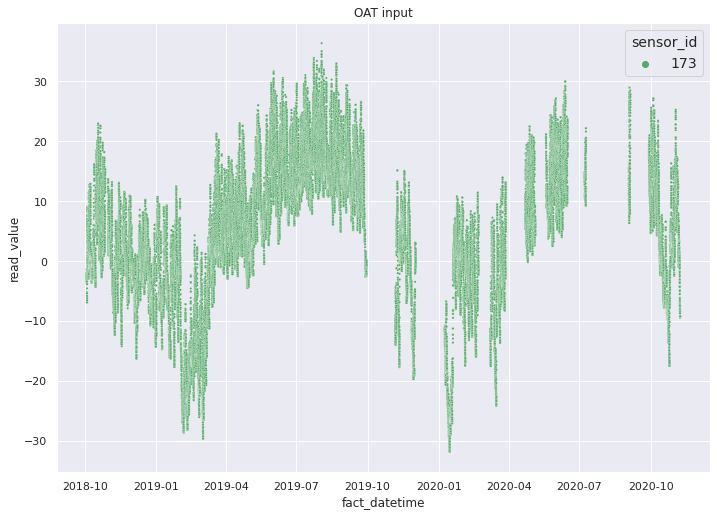

In [49]:
# plot distribution of data over time
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=oat_df.reset_index(), 
                palette=['g'], s=5).set_title('OAT input')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [50]:
# as expected, data looks seasonal, high temperatures in the summer and low temperatures in winter
# quantify gaps in time, first in minutes
oat_df['fact_datetime'] = oat_df.index.get_level_values(0)
oat_df['delta_fact_datetime'] = oat_df['fact_datetime'].diff().astype('timedelta64[m]')
# print out the difference between consecutive rows, together with how many times the difference occurs
print('time between consecutive data points in oat_df:\n')
print(oat_df.delta_fact_datetime.value_counts(dropna=False).to_frame().reset_index()
                                            .to_string(index=False, header=['time (minutes)','count']))

time between consecutive data points in oat_df:

time (minutes)  count
          10.0  73431
           9.0   3229
           0.0      8
          70.0      2
       21705.0      1
           8.0      1
        5280.0      1
        1340.0      1
       34701.0      1
       79724.0      1
       19771.0      1
       36071.0      1
       53372.0      1
       53842.0      1
          20.0      1
         850.0      1
       31551.0      1
           NaN      1


In [51]:
# print the difference in days, is it the same as for target data?
print(oat_df['fact_datetime'].diff().astype('timedelta64[D]').value_counts())
# gaps larger than 10 days (delta_fact_datetime in minutes)
oat_df[(oat_df.delta_fact_datetime >=14400)] 

0.0     76674
37.0        2
21.0        1
55.0        1
13.0        1
24.0        1
15.0        1
3.0         1
25.0        1
Name: fact_datetime, dtype: int64


,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2019-11-05 18:38:59,173,-9.099031,2019-11-05 18:38:59,53372.0
2020-01-08 19:03:47,173,-10.987169,2020-01-08 19:03:47,53842.0
2020-03-07 17:52:57,173,-11.296983,2020-03-07 17:52:57,21705.0
2020-04-21 22:06:19,173,11.224871,2020-04-21 22:06:19,36071.0
2020-05-18 17:08:18,173,21.015453,2020-05-18 17:08:18,19771.0
2020-07-07 17:22:02,173,14.712645,2020-07-07 17:22:02,31551.0
2020-09-02 19:36:23,173,15.544163,2020-09-02 19:36:23,79724.0
2020-09-28 19:08:20,173,19.446840,2020-09-28 19:08:20,34701.0


In [52]:
# pick one of the times above and print out a few lines before and after just to see
oat_df[(oat_df['fact_datetime'] >= pd.Timestamp('2020-06-15 19:00:00')) & 
                  (oat_df['fact_datetime'] <= pd.Timestamp('2020-07-08'))].head(8)

,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2020-06-15 19:00:23,173,17.995443,2020-06-15 19:00:23,10.0
2020-06-15 19:10:22,173,17.995443,2020-06-15 19:10:22,9.0
2020-06-15 19:20:22,173,17.695925,2020-06-15 19:20:22,10.0
2020-06-15 19:30:22,173,17.411308,2020-06-15 19:30:22,10.0
2020-07-07 17:22:02,173,14.712645,2020-07-07 17:22:02,31551.0
2020-07-07 17:32:02,173,14.798934,2020-07-07 17:32:02,10.0
2020-07-07 17:42:02,173,14.798934,2020-07-07 17:42:02,10.0
2020-07-07 17:52:02,173,14.652094,2020-07-07 17:52:02,10.0


oat_df descriptive statistics:

count    76684.000000
mean         4.401633
std         11.762208
min        -31.815857
25%         -2.669802
50%          4.781057
75%         12.832516
max         36.329517
Name: read_value, dtype: float64


oat_df boxplot and histogram of values:


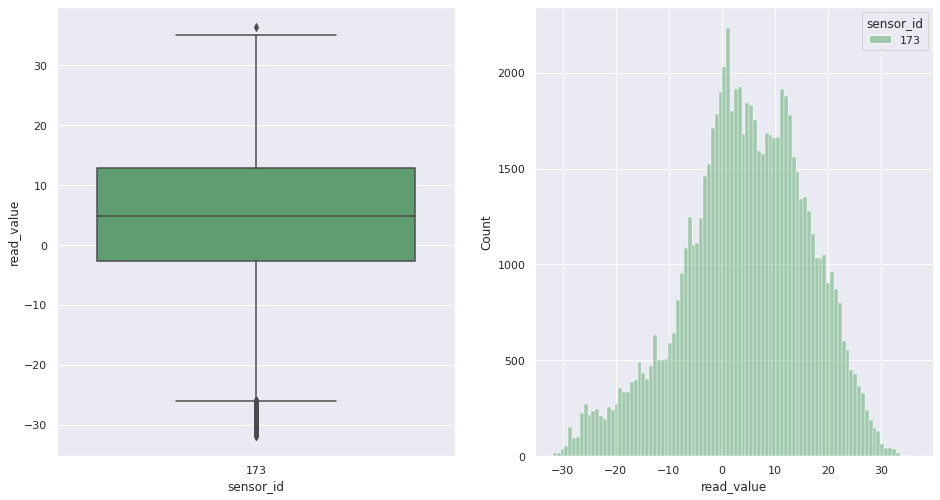

In [53]:
# look at the statistical distribution of read_value values in the oat data
print('oat_df descriptive statistics:\n')
print(oat_df['read_value'].describe())

print('\n\noat_df boxplot and histogram of values:')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15.7,8.27))
sns.boxplot(x='sensor_id', y='read_value', data=oat_df['read_value'].reset_index(), palette=['g'], ax=ax[0])
sns.histplot(x='read_value', data=oat_df['read_value'].reset_index(), hue='sensor_id', 
             palette=['g'], ax=ax[1])

In [54]:
# statistically, there are outliers again, but the histogram looks pretty normal for Calgary
# all values probably valid
# number of outliers
Q1 = oat_df.read_value.quantile(0.25)
Q3 = oat_df.read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((oat_df.read_value < (Q1 - 1.5 * IQR)) | (oat_df.read_value > (Q3 + 1.5 * IQR))).sum()
print(f'num outliers: {num_outliers} out of {len(oat_df)} data points; {round(100*num_outliers/len(oat_df))}% of data')

num outliers: 739 out of 76684 data points; 1% of data


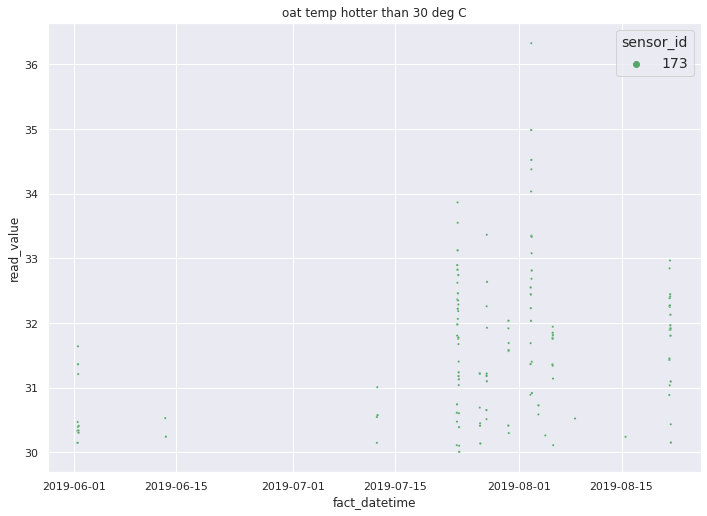

In [55]:
# plot some of the "outliers" (looks like it is just a few days (144 data points per day if full day recorded))
# the outliers are above the Q3 + 1.5 * IQR, about 35 degrees, but plot over 30 just to see
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=oat_df[(oat_df.read_value >= 30)], 
                palette=['g'], s=5).set_title('oat temp hotter than 30 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [56]:
# check how many days have temperature over 30
print(oat_df[(oat_df.read_value >=30)]['fact_datetime'].dt.date.unique())
# 14 days

[datetime.date(2019, 6, 1) datetime.date(2019, 6, 13)
 datetime.date(2019, 7, 12) datetime.date(2019, 7, 23)
 datetime.date(2019, 7, 26) datetime.date(2019, 7, 27)
 datetime.date(2019, 7, 30) datetime.date(2019, 8, 2)
 datetime.date(2019, 8, 3) datetime.date(2019, 8, 4)
 datetime.date(2019, 8, 5) datetime.date(2019, 8, 8)
 datetime.date(2019, 8, 15) datetime.date(2019, 8, 21)]


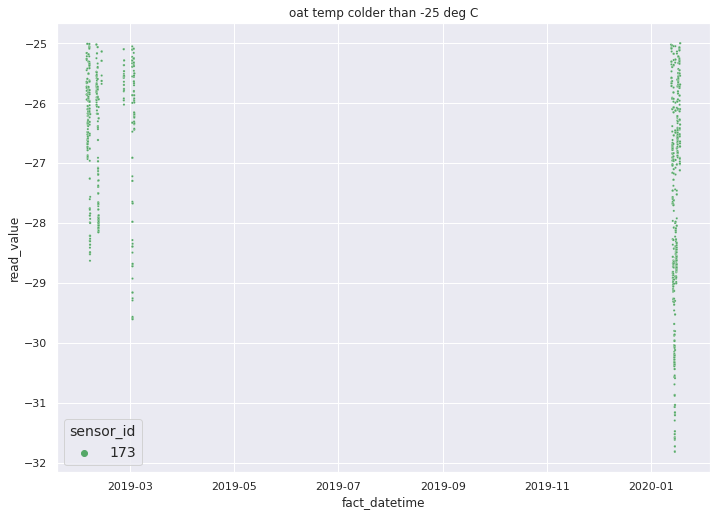

In [57]:
# plot really low temperatures, Q1 - 1.5 * IQR
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=oat_df[(oat_df.read_value <= -25)], 
                palette=['g'], s=5).set_title('oat temp colder than -25 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [58]:
# again, check how many days have temperature lower than -25
print(oat_df[(oat_df.read_value <=-25)]['fact_datetime'].dt.date.unique())
# 15 days

[datetime.date(2019, 2, 3) datetime.date(2019, 2, 4)
 datetime.date(2019, 2, 5) datetime.date(2019, 2, 9)
 datetime.date(2019, 2, 10) datetime.date(2019, 2, 12)
 datetime.date(2019, 2, 25) datetime.date(2019, 3, 2)
 datetime.date(2019, 3, 3) datetime.date(2020, 1, 13)
 datetime.date(2020, 1, 14) datetime.date(2020, 1, 15)
 datetime.date(2020, 1, 16) datetime.date(2020, 1, 17)
 datetime.date(2020, 1, 18)]


### CARPORT PV GENERATION INPUT

power generation data, in watts
  - directly correlated with the amount of sunshine
  - actuating solar panels, tilt for maximum sun exposure
    - can also be tilted so that the snow can slide off
  - theoretical min/max: -50/17000 W

In [59]:
# set and sort index
carport_pv_generation_df = carport_pv_generation_df.set_index(['fact_datetime', 'sensor_id']).sort_index()
carport_pv_generation_df.head()

,,read_value
fact_datetime,sensor_id,
2019-02-15 16:14:00,469,45.0
2019-02-15 16:15:00,469,44.0
2019-02-15 16:16:00,469,43.0
2019-02-15 16:17:00,469,44.0
2019-02-15 16:18:00,469,42.0


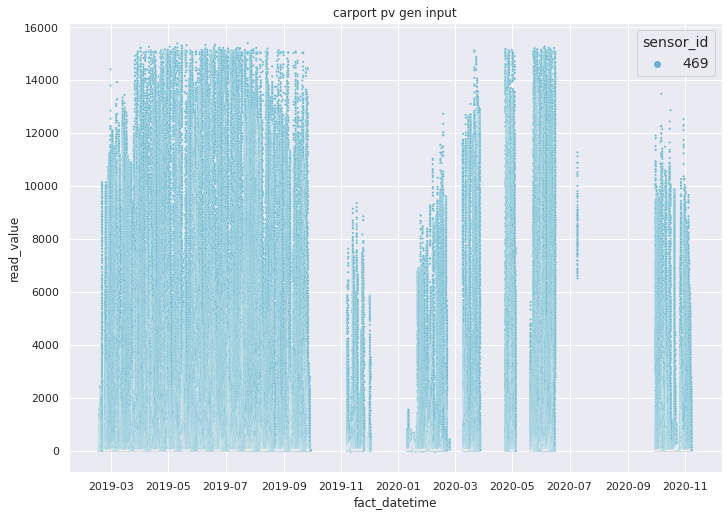

In [60]:
# plot distribution in time
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df.reset_index(), 
                palette=['c'], s=5).set_title('carport pv gen input')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

(0.0, 15000.0)

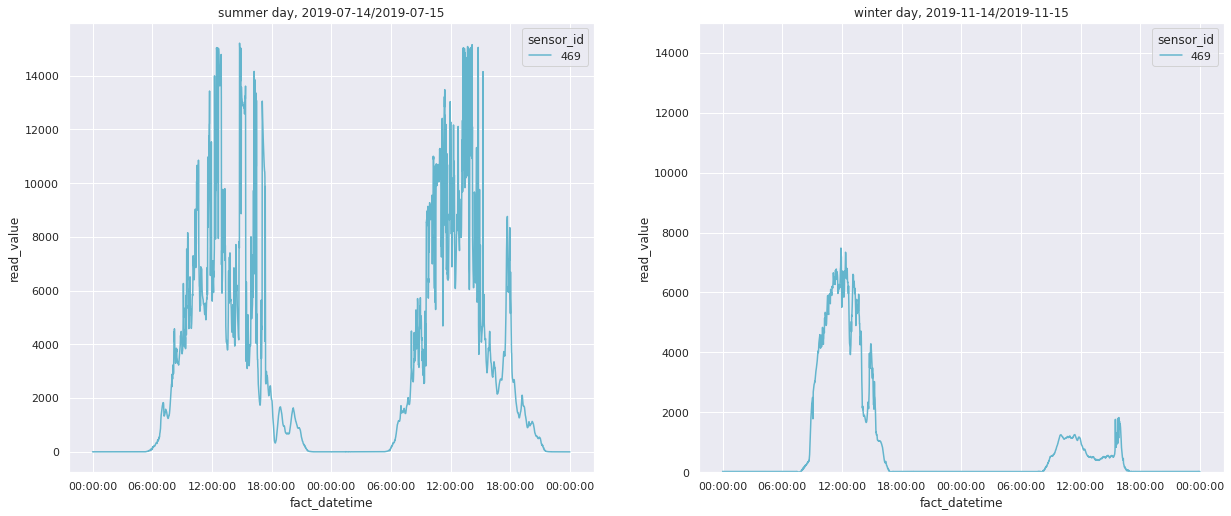

In [61]:
# looks like there is quite a bit of sun at all times, seasonality is not apparent from the above plot with all the data
# plot a random day in summer and winter 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20.7,8.27))

sns.lineplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df['2019-07-14 00:00:00':'2019-07-16 00:00:00'].reset_index(), 
                palette=['c'], ax=ax[0]).set_title('summer day, 2019-07-14/2019-07-15')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

sns.lineplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df['2019-11-14 00:00:00':'2019-11-16 00:00:00'].reset_index(), 
                palette=['c'], ax=ax[1]).set_title('winter day, 2019-11-14/2019-11-15')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.ylim(0, 15000)
# definitely see the seasonal difference from summer to winter, as well as the day/night difference!

In [62]:
# quantify time gaps in carport data, first in minutes
carport_pv_generation_df['fact_datetime'] = carport_pv_generation_df.index.get_level_values(0)
carport_pv_generation_df['delta_fact_datetime'] = carport_pv_generation_df['fact_datetime'].diff().astype('timedelta64[m]')

# print out the difference between consecutive rows, together with how many times the difference occurs
# carport data comes in in one minute intervals
print('time between consecutive data points in carport_pv_generation_df:\n')
print(carport_pv_generation_df.delta_fact_datetime.value_counts(dropna=False).to_frame().reset_index()
                                            .to_string(index=False, header=['time (minutes)','count']))

time between consecutive data points in carport_pv_generation_df:

time (minutes)   count
           1.0  546519
           0.0      36
           9.0       3
           5.0       3
           4.0       3
           2.0       2
          19.0       2
          12.0       2
           3.0       2
       56251.0       1
       33935.0       1
       38461.0       1
          10.0       1
           8.0       1
         841.0       1
       55742.0       1
      119532.0       1
          14.0       1
        3841.0       1
           6.0       1
        4098.0       1
         160.0       1
       20239.0       1
          21.0       1
        1351.0       1
       22178.0       1
        5911.0       1
           NaN       1
          61.0       1


In [63]:
# print the difference in days, is it the same as for target data?
print(carport_pv_generation_df['fact_datetime'].diff().astype('timedelta64[D]').value_counts())
# carport data has different gaps from the temperature data (could be because it was installed later)

# gaps larger than 10 days (delta_fact_datetime in minutes)
carport_pv_generation_df[(carport_pv_generation_df.delta_fact_datetime >=14400)] 

0.0     546581
2.0          2
26.0         1
23.0         1
83.0         1
4.0          1
15.0         1
14.0         1
39.0         1
38.0         1
Name: fact_datetime, dtype: int64


,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2019-11-07 10:36:00,469,348.0,2019-11-07 10:36:00,55742.0
2020-01-10 11:10:00,469,769.0,2020-01-10 11:10:00,56251.0
2020-03-09 10:56:00,469,6283.0,2020-03-09 10:56:00,20239.0
2020-04-23 13:58:00,469,12824.0,2020-04-23 13:58:00,38461.0
2020-05-20 09:13:00,469,969.0,2020-05-20 09:13:00,22178.0
2020-07-09 09:14:00,469,7168.0,2020-07-09 09:14:00,33935.0
2020-09-30 11:05:00,469,3999.0,2020-09-30 11:05:00,119532.0


In [64]:
# pick one of the times above and print out a few lines before and after just to see
carport_pv_generation_df[(carport_pv_generation_df['fact_datetime'] >= pd.Timestamp('2020-06-15 19:35:00')) & 
                         (carport_pv_generation_df['fact_datetime'] <= pd.Timestamp('2020-07-09 10:00:00'))].head(10)

,,read_value,fact_datetime,delta_fact_datetime
fact_datetime,sensor_id,,,
2020-06-15 19:35:00,469,2946.0,2020-06-15 19:35:00,1.0
2020-06-15 19:36:00,469,2861.0,2020-06-15 19:36:00,1.0
2020-06-15 19:37:00,469,2826.0,2020-06-15 19:37:00,1.0
2020-06-15 19:38:00,469,2803.0,2020-06-15 19:38:00,1.0
2020-06-15 19:39:00,469,2764.0,2020-06-15 19:39:00,1.0
2020-07-09 09:14:00,469,7168.0,2020-07-09 09:14:00,33935.0
2020-07-09 09:15:00,469,7187.0,2020-07-09 09:15:00,1.0
2020-07-09 09:16:00,469,7402.0,2020-07-09 09:16:00,1.0
2020-07-09 09:17:00,469,7617.0,2020-07-09 09:17:00,1.0


carport_pv_generation_df descriptive statistics:

count    546592.000000
mean       2404.911885
std        3818.896329
min         -50.000000
25%          11.000000
50%          91.000000
75%        3491.000000
max       15391.000000
Name: read_value, dtype: float64


carport_pv_generation_df boxplot and histogram of values:

 y-axis on the histogram limited to see the distribution:


(0.0, 4000.0)

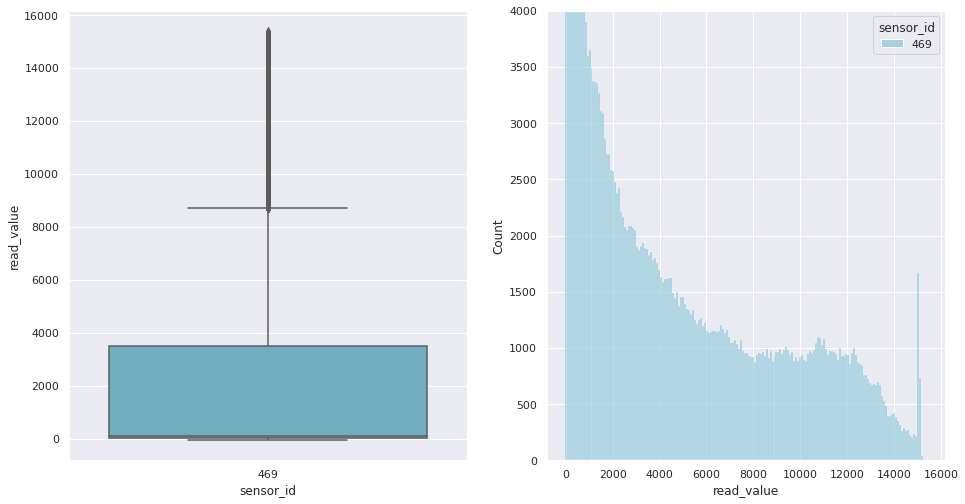

In [65]:
# look at the statistical distribution of read_value values in the carport data
print('carport_pv_generation_df descriptive statistics:\n')
print(carport_pv_generation_df['read_value'].describe())

print('\n\ncarport_pv_generation_df boxplot and histogram of values:')
print('\n y-axis on the histogram limited to see the distribution:')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15.7,8.27))
sns.boxplot(x='sensor_id', y='read_value', data=carport_pv_generation_df['read_value'].reset_index(), 
            palette=['c'], ax=ax[0])
sns.histplot(x='read_value', data=carport_pv_generation_df['read_value'].reset_index(), hue='sensor_id', 
             palette=['c'], ax=ax[1])
# limit the y-axis on the histogram (a lot of low values for power generation because of total length of night time in the data)
plt.ylim(0, 4000)

In [66]:
# both boxplot and histogram show that this data is really skewed towards the low values
# probably because half of the data would be during nighttime, plus lower values from cloudy/rainy/snowy days
# still quite a few really sunny days, where the power generation is almost maxed out
# number of outliers
Q1 = carport_pv_generation_df.read_value.quantile(0.25)
Q3 = carport_pv_generation_df.read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((carport_pv_generation_df.read_value < (Q1 - 1.5 * IQR)) | 
                (carport_pv_generation_df.read_value > (Q3 + 1.5 * IQR))).sum()

print(f'num outliers: {num_outliers} out of {len(carport_pv_generation_df)} data points;' \
      + f' {round(100*num_outliers/len(carport_pv_generation_df))}% of data')

num outliers: 59483 out of 546592 data points; 11% of data


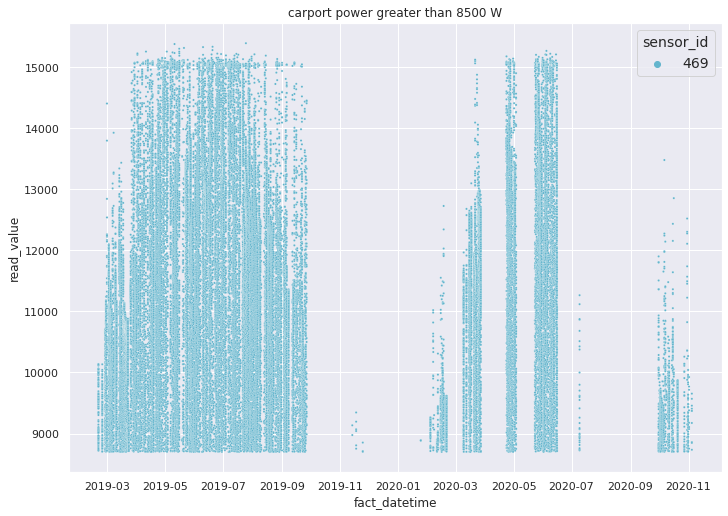

In [67]:
# plot some of the "outliers", Q3 + 1.5 * IQR 
# looks like it is mostly summer months, longer days with more sun, but there are some days in fall too (actuating panels)
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df[(carport_pv_generation_df.read_value >= 8700)], 
                palette=['c'], s=5).set_title('carport power greater than 8500 W')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

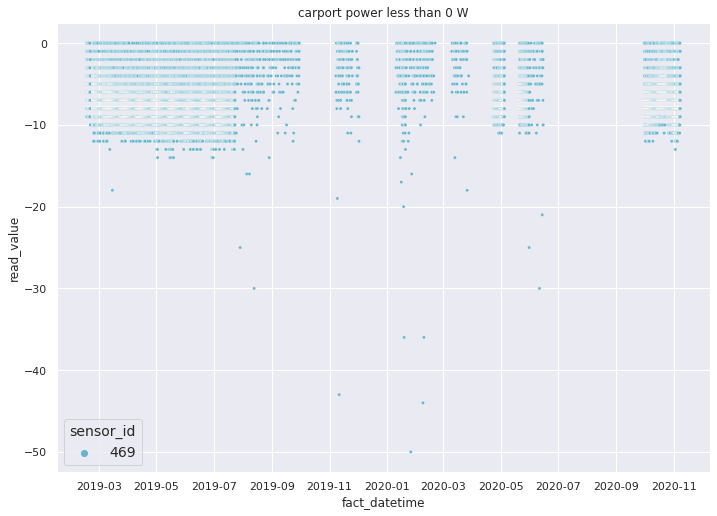

In [68]:
# plot some of the low "outliers" (night values? fairly evenly spread across existing data)
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df[(carport_pv_generation_df.read_value <= 0)], 
                palette=['c'], s=10).set_title('carport power less than 0 W')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

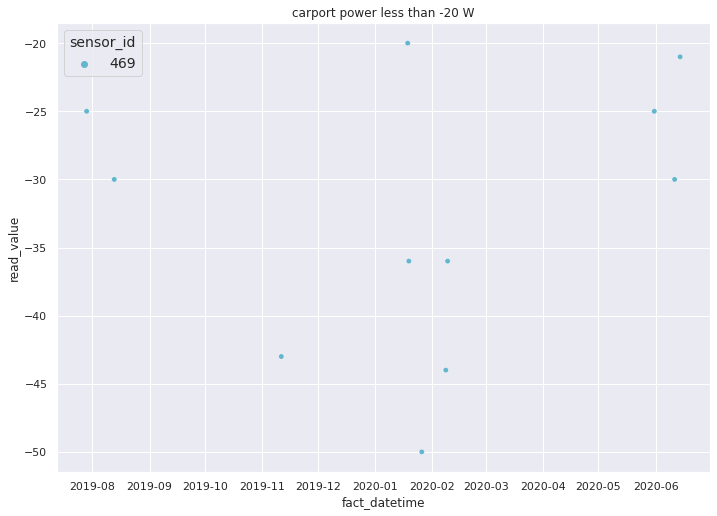

In [69]:
# a few really low values, even in summer months - should investigate why
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=carport_pv_generation_df[(carport_pv_generation_df.read_value <= -20)], 
                palette=['c'], s=30).set_title('carport power less than -20 W')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [70]:
# again, check how many days have temperature lower than -25
print(carport_pv_generation_df[(carport_pv_generation_df.read_value <= -20)]['fact_datetime'].dt.date.unique())
# 11 different days

[datetime.date(2019, 7, 28) datetime.date(2019, 8, 12)
 datetime.date(2019, 11, 11) datetime.date(2020, 1, 18)
 datetime.date(2020, 1, 19) datetime.date(2020, 1, 26)
 datetime.date(2020, 2, 8) datetime.date(2020, 2, 9)
 datetime.date(2020, 5, 31) datetime.date(2020, 6, 11)
 datetime.date(2020, 6, 14)]


### SOLAR ROOF/WALL INPUT

solar roof and wall temperature readings
  - not sure the exact location of the sensors, believe behind cladding

In [71]:
# set and sort the index (2 sensors in this dataframe)
solar_roof_wall_temp_df = solar_roof_wall_temp_df.set_index(['fact_datetime', 'sensor_id']).sort_index()
solar_roof_wall_temp_df.head()

read_value
fact_datetime       sensor_id            
2018-08-31 05:00:00 146         10.513422
                    185          8.432381
2018-09-20 23:00:00 146          9.330368
                    185          8.239597
2018-10-11 14:30:00 146         34.545948

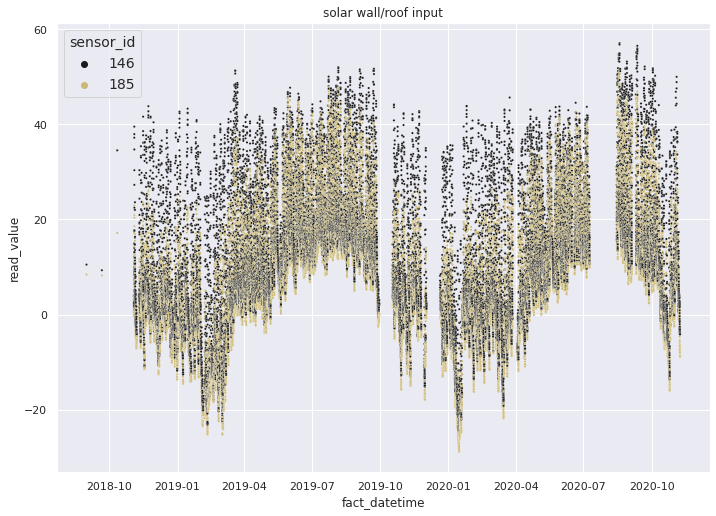

In [72]:
# plot the distribution of data in time
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=solar_roof_wall_temp_df.reset_index(), 
                palette=['k','y'], s=5).set_title('solar wall/roof input')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [73]:
# mostly high temperatures, with evident sesonality in the plot
# both sensors follow each other closely

# quantify time gaps in data again, in minutes
solar_roof_wall_temp_df['fact_datetime'] = solar_roof_wall_temp_df.index.get_level_values(0)
solar_roof_wall_temp_df['delta_fact_datetime'] = solar_roof_wall_temp_df['fact_datetime'].groupby(level=1).diff().astype('timedelta64[m]')

# print out the difference between consecutive rows, together with how many times the difference occurs
# this data comes in 30 minute intervals
print('time between consecutive data points in solar_roof_wall_temp_df:\n')
print(solar_roof_wall_temp_df.delta_fact_datetime.value_counts(dropna=False).to_frame().reset_index()
                                            .to_string(index=False, header=['time (minutes)','count']))

time between consecutive data points in solar_roof_wall_temp_df:

time (minutes)  count
          30.0  61529
           0.0      4
          90.0      4
          29.0      4
       26370.0      2
        4140.0      2
        7230.0      2
        8610.0      2
       29730.0      2
        5910.0      2
       29880.0      2
         870.0      2
          60.0      2
       52260.0      2
       32310.0      2
        1380.0      2
        4050.0      2
           NaN      2
       25950.0      1
       25980.0      1


In [74]:
# print the difference in days, is it the same as for target data?
print(solar_roof_wall_temp_df['fact_datetime'].groupby(level=1).diff().astype('timedelta64[D]').value_counts()) 
# gaps larger than 10 days (delta_fact_datetime in minutes)
solar_roof_wall_temp_df[(solar_roof_wall_temp_df.delta_fact_datetime >=14400)] 

0.0     61547
5.0         4
18.0        4
2.0         4
20.0        4
22.0        2
36.0        2
4.0         2
Name: fact_datetime, dtype: int64


read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2018-09-20 23:00:00 146          9.330368  ...             29880.0
                    185          8.239597  ...             29880.0
2018-10-11 14:30:00 146         34.545948  ...             29730.0
                    185         17.152288  ...             29730.0
2018-11-03 01:00:00 146          4.088793  ...             32310.0
                    185          2.804868  ...             32310.0
2019-10-17 18:00:00 146         17.361971  ...             25980.0
                    185         14.961089  ...             25950.0
2019-12-20 17:00:00 146          8.144163  ...             26370.0
                    185          5.875589  ...             26370.0
2020-08-14 17:30:00 146         31.125439  ...             52260.0
                    185         27.984207  ...             52260.0

[12 rows x 3 columns]

In [75]:
# pick one of the times above and print out a few lines before and after just to see
solar_roof_wall_temp_df[(solar_roof_wall_temp_df['fact_datetime'] >= pd.Timestamp('2020-07-09 09:30:00')) & 
                        (solar_roof_wall_temp_df['fact_datetime'] <= pd.Timestamp('2020-08-14 19:00:00'))].head(10)

read_value  ... delta_fact_datetime
fact_datetime       sensor_id              ...                    
2020-07-09 09:30:00 146         18.969990  ...                30.0
                    185         18.339956  ...                30.0
2020-07-09 10:00:00 146         21.527147  ...                30.0
                    185         20.650688  ...                30.0
2020-07-09 10:30:00 146         24.671577  ...                30.0
                    185         22.813263  ...                30.0
2020-08-14 17:30:00 146         31.125439  ...             52260.0
                    185         27.984207  ...             52260.0
2020-08-14 18:00:00 146         30.466465  ...                30.0
                    185         29.279694  ...                30.0

[10 rows x 3 columns]

solar_roof_wall_temp_df descriptive statistics:

sensor_id = 146:
 count    30785.000000
mean        11.464813
std         13.891931
min        -26.162893
25%          1.720369
50%         10.579925
75%         19.870649
max         57.083519
Name: read_value, dtype: float64

sensor_id = 185:
 count    30786.000000
mean         8.262909
std         13.316186
min        -28.873293
25%         -0.786724
50%          7.761734
75%         16.629929
max         51.544342
Name: read_value, dtype: float64


solar_roof_wall_temp_df boxplot and histogram of values:


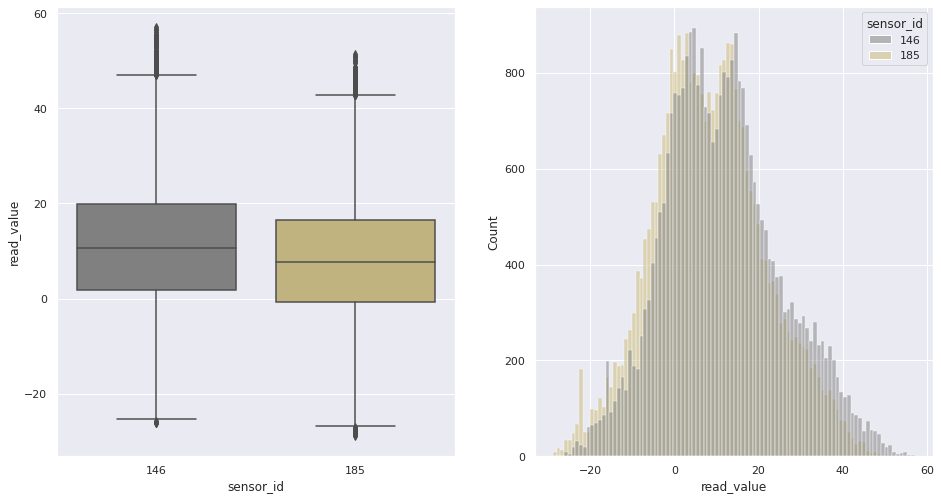

In [76]:
# look at the statistical distribution of read_value values in the solar input data 
# (146 - solar wall temperature; 185 - solar roof temperature)
print('solar_roof_wall_temp_df descriptive statistics:\n')
print('sensor_id = 146:\n',solar_roof_wall_temp_df['read_value'].xs(146,level='sensor_id').describe())
print('\nsensor_id = 185:\n',solar_roof_wall_temp_df['read_value'].xs(185,level='sensor_id').describe())

print('\n\nsolar_roof_wall_temp_df boxplot and histogram of values:')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15.7,8.27))
sns.boxplot(x='sensor_id', y='read_value', data=solar_roof_wall_temp_df['read_value'].reset_index(), 
            palette=['grey','y'], ax=ax[0])
sns.histplot(x='read_value', data=solar_roof_wall_temp_df['read_value'].reset_index(), hue='sensor_id', 
             palette=['grey','y'], ax=ax[1])

In [77]:
# fairly symmetrical distribution of data, 
# a bit of a bimodal shape - usually occurs when data comes from two sources, not sure what the meaning here would be

# number of outliers
# sensor 146
Q1 = solar_roof_wall_temp_df.xs(146, level=1).read_value.quantile(0.25)
Q3 = solar_roof_wall_temp_df.xs(146, level=1).read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((solar_roof_wall_temp_df.xs(146, level=1).read_value < (Q1 - 1.5 * IQR)) | 
                (solar_roof_wall_temp_df.xs(146, level=1).read_value > (Q3 + 1.5 * IQR))).sum()

print(f'num outliers, 146: {num_outliers} out of {len(solar_roof_wall_temp_df.xs(146, level=1))} data points;' \
      + f' {round(100*num_outliers/len(solar_roof_wall_temp_df.xs(146, level=1)))}% of data')

# sensor 185
Q1 = solar_roof_wall_temp_df.xs(185, level=1).read_value.quantile(0.25)
Q3 = solar_roof_wall_temp_df.xs(185, level=1).read_value.quantile(0.75)
IQR = Q3 - Q1
num_outliers = ((solar_roof_wall_temp_df.xs(185, level=1).read_value < (Q1 - 1.5 * IQR)) | 
                (solar_roof_wall_temp_df.xs(185, level=1).read_value > (Q3 + 1.5 * IQR))).sum()

print(f'num outliers, 185: {num_outliers} out of {len(solar_roof_wall_temp_df.xs(185, level=1))} data points; ' \
      + f'{round(100*num_outliers/len(solar_roof_wall_temp_df.xs(185, level=1)))}% of data')
# pretty small number of outliers

num outliers, 146: 219 out of 30785 data points; 1% of data
num outliers, 185: 154 out of 30786 data points; 1% of data


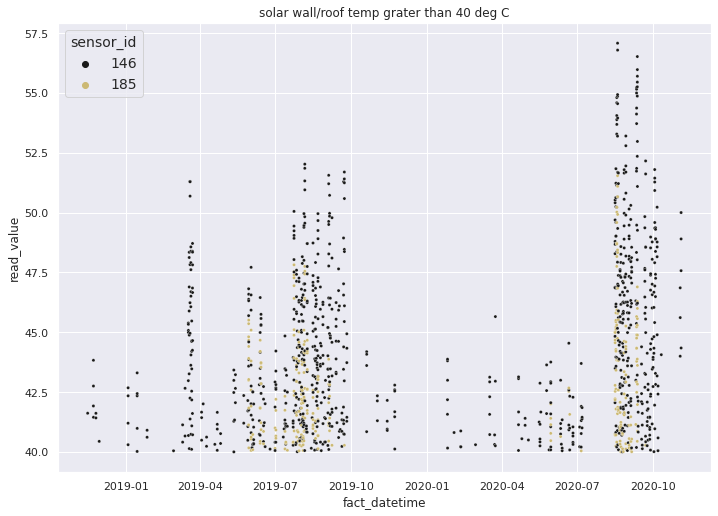

In [78]:
# plot some of the "outliers" 
# high temperature ones
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value >= 40)], 
                palette=['k','y'], s=10).set_title('solar wall/roof temp grater than 40 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [79]:
# check how many days have temperature over 40

# uncomment this line to see the list of days instead of just total number
# print(solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value >=40)]['fact_datetime'].dt.date.unique())
print(len(solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value >=40)]['fact_datetime'].dt.date.unique()), "unique days")

161 unique days


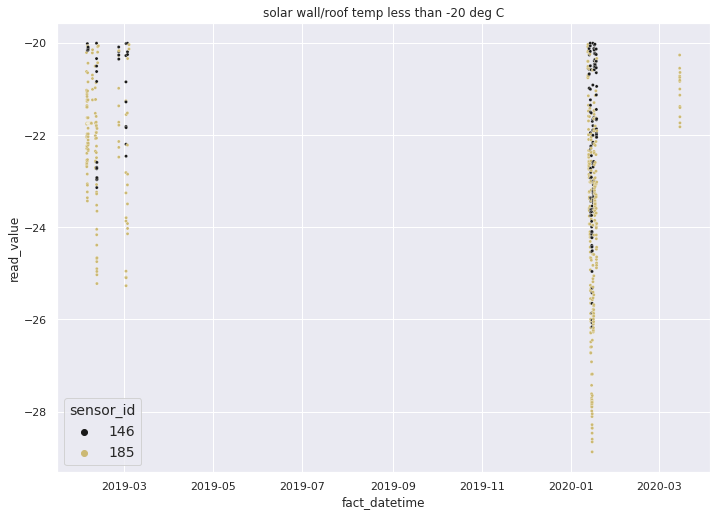

In [80]:
# low temperature ones
sns.scatterplot(x='fact_datetime', y='read_value', hue='sensor_id', data=solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value <= -20)], 
                palette=['k','y'], s=10).set_title('solar wall/roof temp less than -20 deg C')
plt.legend(title='sensor_id', fontsize='14', title_fontsize='14')

In [81]:
# check how many days have solar wall/temperature readings colder than -20

# uncomment this line to see the list of days instead of just total number
# print(solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value <=-20)]['fact_datetime'].dt.date.unique())
print(len(solar_roof_wall_temp_df[(solar_roof_wall_temp_df.read_value <=-20)]['fact_datetime'].dt.date.unique()), "unique days")

20 unique days


###**NOTES**

1. Even though there are no missing values in the provided csv files, there are big gaps in time for all of the sensors 
  - some ways to deal with the missing data
    - interpolate missing data using existing ones
      - 55 days is a pretty large gap to use regular interpolation, especially with seasonality in both winter/summer season and day/night    
    - only use data for time periods where values for all the sensors exist

2. Seasonality in the data
  - all of the data shows seasonality during the calendar year
  - day/night seasonality exists as well

3. Data comes in 3 different time intervals
  - resample all inputs to get the same fact_datetime intervals for combining 
    - what is the best interval to pick? 
      - **the target data is in 10 minute intervals**
      - options include 10 or 30 minutes (can make both and see how model behaves), or even hourly data?
      - resampling works by taking the mean of the read_value for the time period - some of the missing data will be "removed" by this because resample ignores NaN values
  

---
---
##**COMBINE DATA**
- ignore the missing data when creating the combined dataframe
---
---

In [82]:
# reprint raw data rows/column numbers
print('east_zone_temp_df: ', east_zone_temp_df.shape)
print('hrv_supply_temp_df: ', hrv_supply_temp_df.shape)
print('oat_df: ', oat_df.shape)
print('carport_pv_generation_df: ', carport_pv_generation_df.shape)
print('solar_roof_wall_temp_df: ', solar_roof_wall_temp_df.shape)

east_zone_temp_df:  (76934, 3)
hrv_supply_temp_df:  (153377, 3)
oat_df:  (76684, 3)
carport_pv_generation_df:  (546592, 3)
solar_roof_wall_temp_df:  (61571, 3)


### 10-minute resampling
- create the dataframe with 10 minute intervals to match the interval rate of target data

In [83]:
# combined dataframe

# find the minimum and maximum times in the input files
start_datetime = min([east_zone_temp_df.fact_datetime.min(), hrv_supply_temp_df.fact_datetime.min(), 
                      oat_df.fact_datetime.min(), carport_pv_generation_df.fact_datetime.min(), 
                      solar_roof_wall_temp_df.fact_datetime.min()])
print("min start date and hour of all files: ", start_datetime)

end_datetime = max([east_zone_temp_df.fact_datetime.max(), hrv_supply_temp_df.fact_datetime.max(), 
                    oat_df.fact_datetime.max(), carport_pv_generation_df.fact_datetime.max(), 
                    solar_roof_wall_temp_df.fact_datetime.max()])
print("max end date and hour: ", end_datetime) # but max date is from solar, really end_datetime+20 minutes (two extra data points) 
                                               # - will be nan for other inputs anyway, so no need to set at the moment

# set date range between the min and max times, with 10 minute interval
date_range = pd.date_range(start_datetime, end_datetime, freq='10T')
# create combined dataframe
aggregated_df = pd.DataFrame({'DateAndTimeIndex': date_range, 'fact_date': [d.date() for d in date_range],
                              'fact_time': [d.time() for d in date_range]})    
aggregated_df.set_index('DateAndTimeIndex', inplace=True)

aggregated_df.head()

min start date and hour of all files:  2018-08-31 05:00:00
max end date and hour:  2020-11-08 04:00:00


,fact_date,fact_time
DateAndTimeIndex,,
2018-08-31 05:00:00,2018-08-31,05:00:00
2018-08-31 05:10:00,2018-08-31,05:10:00
2018-08-31 05:20:00,2018-08-31,05:20:00
2018-08-31 05:30:00,2018-08-31,05:30:00
2018-08-31 05:40:00,2018-08-31,05:40:00


In [84]:
# add each of the resampled columns from input dataframes (using unstack to resample and reshape into sensor_id columns)

# east_zone_temp_df (target data)
east_zone_resampled_10 = east_zone_temp_df[['read_value']].copy()
east_zone_resampled_10.sort_index(inplace=True) # just in case
east_zone_resampled_10.read_value = east_zone_resampled_10.read_value.apply(pd.to_numeric)    # optional args: errors='coerce', axis=1

# drop all rows that do not have read_value value
east_zone_resampled_10 = east_zone_resampled_10.read_value.unstack(level=1).resample('10T').mean().dropna(how='all')
east_zone_resampled_10 = east_zone_resampled_10.add_prefix('read_value_')

for col in east_zone_resampled_10.columns:
  if col not in aggregated_df.columns:
    aggregated_df = pd.concat([aggregated_df, east_zone_resampled_10], axis = 1) # NOTE: add new column only if it doesn't already exist

# print some values in the original dataframe and compare that it is correctly added to aggregated_df
print(east_zone_temp_df['read_value'].head(15))
print('\naggregated df:')
print(aggregated_df[(aggregated_df.index >= pd.Timestamp('2018-10-02 18:30:00'))].head(16))

fact_datetime        sensor_id
2018-10-02 18:49:28  406          21.621559
2018-10-02 18:59:28  406          21.621559
2018-10-02 19:09:28  406          21.621559
2018-10-02 19:19:29  406          21.600716
2018-10-02 19:29:29  406          21.590544
2018-10-02 19:39:29  406          21.579870
2018-10-02 19:49:29  406          21.559023
2018-10-02 19:59:29  406          21.559023
2018-10-02 20:09:29  406          21.559023
2018-10-02 20:19:29  406          21.521704
2018-10-02 20:29:29  406          21.538177
2018-10-02 20:39:29  406          21.430719
2018-10-02 20:49:29  406          21.413099
2018-10-02 20:59:29  406          21.433943
2018-10-02 21:09:29  406          21.454794
Name: read_value, dtype: float64

aggregated df:
                      fact_date fact_time  read_value_406
2018-10-02 18:30:00  2018-10-02  18:30:00             NaN
2018-10-02 18:40:00  2018-10-02  18:40:00       21.621559
2018-10-02 18:50:00  2018-10-02  18:50:00       21.621559
2018-10-02 19:00:00  2018-10

In [85]:
# do the same with hrv input
hrv_supply_resampled_10 = hrv_supply_temp_df[['read_value']].copy()
hrv_supply_resampled_10.sort_index(inplace=True)
hrv_supply_resampled_10.read_value = hrv_supply_resampled_10.read_value.apply(pd.to_numeric)

hrv_supply_resampled_10 = hrv_supply_resampled_10.read_value.unstack(level=1).resample('10T').mean().dropna(how='all')
hrv_supply_resampled_10 = hrv_supply_resampled_10.add_prefix('read_value_')

for col in hrv_supply_resampled_10.columns:
  if col not in aggregated_df.columns:
    aggregated_df = pd.concat([aggregated_df, hrv_supply_resampled_10], axis = 1)

# print and compare that it is correctly added (2 sensors for HRV!)
print(hrv_supply_temp_df['read_value'].head(15))
print('\naggregated df:')
print(aggregated_df[(aggregated_df.index >= pd.Timestamp('2018-10-02 18:30:00'))].head(16))

fact_datetime        sensor_id
2018-10-02 18:47:03  427          37.712791
2018-10-02 18:47:09  466          37.657806
2018-10-02 18:57:03  427          37.965393
2018-10-02 18:57:09  466          37.784966
2018-10-02 19:07:03  427          38.166439
2018-10-02 19:07:09  466          38.193935
2018-10-02 19:17:04  427          38.163002
2018-10-02 19:17:10  466          38.135509
2018-10-02 19:27:04  427          38.178467
2018-10-02 19:27:10  466          38.183624
2018-10-02 19:37:04  427          39.333206
2018-10-02 19:37:10  466          39.384758
2018-10-02 19:47:04  427          39.836685
2018-10-02 19:47:10  466          39.848713
2018-10-02 19:57:04  427          39.180271
Name: read_value, dtype: float64

aggregated df:
                      fact_date fact_time  ...  read_value_427  read_value_466
2018-10-02 18:30:00  2018-10-02  18:30:00  ...             NaN             NaN
2018-10-02 18:40:00  2018-10-02  18:40:00  ...       37.712791       37.657806
2018-10-02 18:50:00  20

In [86]:
#oat input
oat_resampled_10 = oat_df[['read_value']].copy()
oat_resampled_10.sort_index(inplace=True)
oat_resampled_10.read_value = oat_resampled_10.read_value.apply(pd.to_numeric)

oat_resampled_10 = oat_resampled_10.read_value.unstack(level=1).resample('10T').mean().dropna(how='all')
oat_resampled_10 = oat_resampled_10.add_prefix('read_value_')

for col in oat_resampled_10.columns:
  if col not in aggregated_df.columns:
    aggregated_df = pd.concat([aggregated_df, oat_resampled_10], axis = 1)

# print and compare that it is correctly added
print(oat_df['read_value'].head(15))
print('\naggregated df:')
print(aggregated_df[(aggregated_df.index >= pd.Timestamp('2018-10-02 18:30:00'))].head(16))

fact_datetime        sensor_id
2018-10-02 18:49:28  173         -1.417232
2018-10-02 18:59:28  173         -1.417232
2018-10-02 19:09:28  173         -1.873541
2018-10-02 19:19:29  173         -1.986704
2018-10-02 19:29:29  173         -1.986704
2018-10-02 19:39:29  173         -2.132727
2018-10-02 19:49:29  173         -2.118125
2018-10-02 19:59:29  173         -2.118125
2018-10-02 20:09:29  173         -2.247715
2018-10-02 20:19:29  173         -2.314153
2018-10-02 20:29:29  173         -2.314153
2018-10-02 20:39:29  173         -2.430237
2018-10-02 20:49:29  173         -2.514202
2018-10-02 20:59:29  173         -2.514202
2018-10-02 21:09:29  173         -2.505076
Name: read_value, dtype: float64

aggregated df:
                      fact_date fact_time  ...  read_value_466  read_value_173
2018-10-02 18:30:00  2018-10-02  18:30:00  ...             NaN             NaN
2018-10-02 18:40:00  2018-10-02  18:40:00  ...       37.657806       -1.417232
2018-10-02 18:50:00  2018-10-02  18:50

In [87]:
# carport pv generation
carport_resampled_10 = carport_pv_generation_df[['read_value']].copy()
carport_resampled_10.sort_index(inplace=True)
carport_resampled_10.read_value = carport_resampled_10.read_value.apply(pd.to_numeric)

carport_resampled_10 = carport_resampled_10.read_value.unstack(level=1).resample('10T').mean().dropna(how='all')
carport_resampled_10 = carport_resampled_10.add_prefix('read_value_')

for col in carport_resampled_10.columns:
  if col not in aggregated_df.columns:
    aggregated_df = pd.concat([aggregated_df, carport_resampled_10], axis = 1)

# print and compare that it is correctly added
# resample value will be mean of all values between two timestamps, ignoring missing values
# for example for 2019-02-15 16:10:00, resample will calculate mean for values between 2019-02-15 16:10:00 to 2019-02-15 16:19:00
print(carport_pv_generation_df['read_value'].head(18))
print('\naggregated df:')
print(aggregated_df[(aggregated_df.index >= pd.Timestamp('2019-02-15 16:10:00'))].head(4))

fact_datetime        sensor_id
2019-02-15 16:14:00  469          45.0
2019-02-15 16:15:00  469          44.0
2019-02-15 16:16:00  469          43.0
2019-02-15 16:17:00  469          44.0
2019-02-15 16:18:00  469          42.0
2019-02-15 16:19:00  469          44.0
2019-02-15 16:20:00  469          43.0
2019-02-15 16:21:00  469          43.0
2019-02-15 16:22:00  469          41.0
2019-02-15 16:23:00  469          42.0
2019-02-15 16:24:00  469          42.0
2019-02-15 16:25:00  469          42.0
2019-02-15 16:26:00  469          43.0
2019-02-15 16:27:00  469          40.0
2019-02-15 16:28:00  469          41.0
2019-02-15 16:29:00  469          38.0
2019-02-15 16:30:00  469          39.0
2019-02-15 16:31:00  469          39.0
Name: read_value, dtype: float64

aggregated df:
                      fact_date fact_time  ...  read_value_173  read_value_469
2019-02-15 16:10:00  2019-02-15  16:10:00  ...      -14.723319       43.666667
2019-02-15 16:20:00  2019-02-15  16:20:00  ...      -15.2292

In [88]:
# solar roof/wall, same as above
solar_resampled_10 = solar_roof_wall_temp_df[['read_value']].copy()
solar_resampled_10.sort_index(inplace=True)
solar_resampled_10.read_value = solar_resampled_10.read_value.apply(pd.to_numeric)

solar_resampled_10 = solar_resampled_10.read_value.unstack(level=1).resample('10T').mean().ffill(limit=2).dropna(how='all')
solar_resampled_10 = solar_resampled_10.add_prefix('read_value_')

for col in solar_resampled_10.columns:
  if col not in aggregated_df.columns:
    aggregated_df = pd.concat([aggregated_df, solar_resampled_10], axis = 1)

# print and compare that it is correctly added (2 sensors for solar dataframe!)
# since resampling from 30 minutes to 10, each value should be repeated 3 times
# for example 2018-10-11 14:30:00 read_value will show in the aggregated_df 
# for 2018-10-11 14:30:00, 2018-10-11 14:40:00, and 2018-10-11  14:40:00 timestamps
print(solar_roof_wall_temp_df['read_value'].head(10))
print('\naggregated df:')
print(aggregated_df[(aggregated_df.index >= pd.Timestamp('2018-10-11 14:30:00'))].head(10))

fact_datetime        sensor_id
2018-08-31 05:00:00  146          10.513422
                     185           8.432381
2018-09-20 23:00:00  146           9.330368
                     185           8.239597
2018-10-11 14:30:00  146          34.545948
                     185          17.152288
2018-11-03 01:00:00  146           4.088793
                     185           2.804868
2018-11-03 01:30:00  146           3.785206
                     185           2.666522
Name: read_value, dtype: float64

aggregated df:
                      fact_date fact_time  ...  read_value_146  read_value_185
2018-10-11 14:30:00  2018-10-11  14:30:00  ...       34.545948       17.152288
2018-10-11 14:40:00  2018-10-11  14:40:00  ...       34.545948       17.152288
2018-10-11 14:50:00  2018-10-11  14:50:00  ...       34.545948       17.152288
2018-10-11 15:00:00  2018-10-11  15:00:00  ...             NaN             NaN
2018-10-11 15:10:00  2018-10-11  15:10:00  ...             NaN             NaN
2018-1

In [99]:
# check how many missing rows in each column
aggregated_df.isnull().sum()

fact_date             0
fact_time             0
read_value_406    38277
read_value_427    38524
read_value_466    38521
read_value_173    38528
read_value_469    60512
read_value_146    22848
read_value_185    22845
dtype: int64

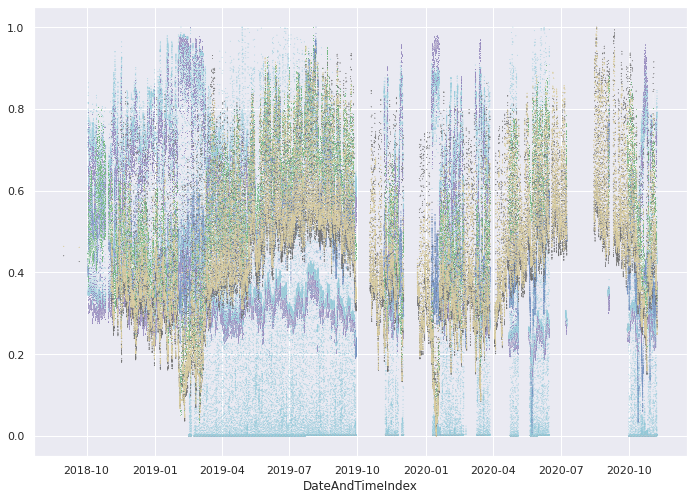

In [107]:
# make sure aggregated_df has a name for the index
aggregated_df.index.name = 'DateAndTimeIndex'

# plot all of the combined data in one plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
# scale so that all data can be shown on one plot
df = aggregated_df[[col for col in aggregated_df if col.startswith('read_value_')]].copy()
df = (df - df.min()) / \
      (df.max() - df.min())
sns.scatterplot(data=df, palette=['b','c','m','g','c','k','y'], alpha=0.8, s=1,legend=False)

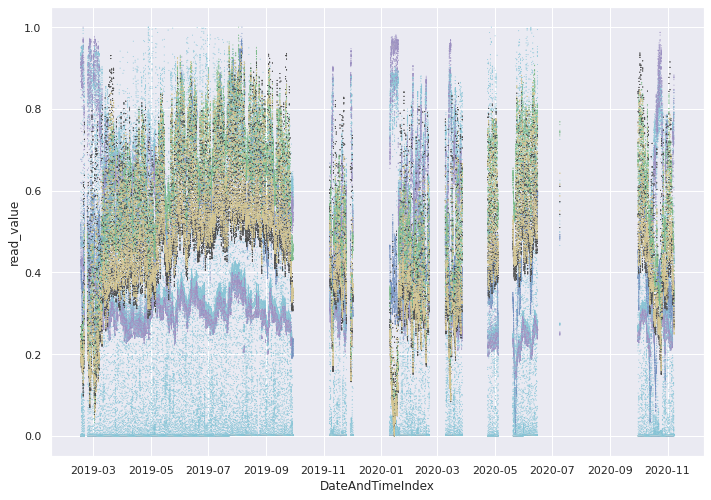

In [91]:
# take a look at how the combined data looks when rows with missing data are removed 
# again use the temporary df dataframe with scaled values in columns for plotting
df_no_nan = df.dropna().reset_index().melt(
    'DateAndTimeIndex',var_name='sensor_id', value_name='read_value')

sns.scatterplot(x='DateAndTimeIndex', y='read_value', hue='sensor_id', data=df_no_nan, 
                palette=['b','c','m','g','c','k','y'], alpha=0.8, s=1,legend=False)

In [93]:
# check the time gaps in the combined data when rows with NaN in any column are deleted
# use original combined dataframe without scaling
df_no_nan = aggregated_df.dropna().copy()
df_no_nan['delta_datetime'] = df_no_nan.index.to_series().diff().astype('timedelta64[m]') # difference in minutes

In [94]:
# use the time difference data to get number of consecutive days where all the sensors have read_values
# mark the consecutive blocks
v = (df_no_nan.delta_datetime != df_no_nan.delta_datetime.shift()).cumsum() # the condition returns true/false (1/0) so cumsum doesn't change until delta changes
# count goes up everytime delta_datetime changes - most values 10 minutes
u = df_no_nan.groupby(v)['delta_datetime'].agg(['all', 'count']) # cumsum values from above become the index of this df

m = u['all'] & u['count'].ge(1440) # want more than 10 day's data

# make frame of continuous data start and stop times
con_data = df_no_nan.groupby(v).apply(lambda x: (x.index[0], x.index[-1]))[m]
# the actual start_datetime is the previous one, as the consecutive blocks are marked on delta_datetime changes

con_data_df = pd.DataFrame(con_data.to_list(), columns=['start_datetime', 'end_datetime'])
con_data_df['num_consecutive_days'] = (con_data_df['end_datetime'] - con_data_df['start_datetime']).dt.days
con_data_df


,start_datetime,end_datetime,num_consecutive_days
0,2019-03-10 03:10:00,2019-03-23 12:40:00,13
1,2019-03-25 01:20:00,2019-04-04 12:40:00,10
2,2019-04-04 15:20:00,2019-07-14 00:50:00,100
3,2019-07-23 08:10:00,2019-09-29 17:00:00,68
4,2020-01-10 11:20:00,2020-02-18 11:40:00,39
5,2020-04-23 14:00:00,2020-05-04 23:30:00,11
6,2020-05-20 09:20:00,2020-06-10 13:20:00,21
7,2020-09-30 11:10:00,2020-11-08 03:40:00,38


In [95]:
# take a look at the dataframe for the first gap above
df_no_nan[(df_no_nan.index >= pd.Timestamp('2019-03-23 12:40:00')) & 
          (df_no_nan.index <= pd.Timestamp('2019-03-25 01:20:00'))]
# regular, linear interpolation can work for data points with 20 minutes delta_datetime 
# but bigger time gaps still a problem

,fact_date,fact_time,read_value_406,read_value_427,read_value_466,read_value_173,read_value_469,read_value_146,read_value_185,delta_datetime
DateAndTimeIndex,,,,,,,,,,
2019-03-23 12:40:00,2019-03-23,12:40:00,24.014166,22.103033,22.110514,13.404730,8577.0,29.923443,19.435198,10.0
2019-03-23 13:00:00,2019-03-23,13:00:00,24.018915,22.062637,22.085077,14.322087,8809.7,32.679535,21.502375,20.0
2019-03-23 13:10:00,2019-03-23,13:10:00,24.018919,22.046183,22.062637,14.322087,7874.3,32.679535,21.502375,10.0
2019-03-23 13:20:00,2019-03-23,13:20:00,24.039762,22.020752,22.046183,13.736250,8507.6,32.679535,21.502375,10.0
2019-03-23 13:30:00,2019-03-23,13:30:00,24.060606,22.007286,22.022247,14.207041,8709.7,33.278408,22.697311,10.0
...,...,...,...,...,...,...,...,...,...,...
2019-03-25 00:30:00,2019-03-25,00:30:00,21.459595,23.231001,22.602688,-0.398746,-8.0,2.782242,0.919282,10.0
2019-03-25 00:40:00,2019-03-25,00:40:00,21.475637,23.177145,22.523403,-0.398746,-7.1,2.782242,0.919282,10.0
2019-03-25 00:50:00,2019-03-25,00:50:00,21.475637,23.112820,22.447109,-0.420649,-7.8,2.782242,0.919282,10.0


In [ ]:
# output the combined dataframe into a csv file on the local computer
aggregated_df.to_csv('gbt_combined_data_10min.csv') 

from google.colab import files

files.download("gbt_combined_data_10min.csv")

### 1 hour resampling
Increase sampling from 10 minutes to 1 hour and examine combined data
- averages values within sampling window, so could come out with a longer block of consecutive data

In [96]:
# follow same steps as above to create the combined dataframe
# find minimum and maximum values for the datetime index, and set range in 1 hour steps
start_datetime = min([east_zone_temp_df.fact_datetime.min(), hrv_supply_temp_df.fact_datetime.min(), 
                      oat_df.fact_datetime.min(), carport_pv_generation_df.fact_datetime.min(), 
                      solar_roof_wall_temp_df.fact_datetime.min()])
print("min start date and hour of all files: ", start_datetime)

end_datetime = max([east_zone_temp_df.fact_datetime.max(), hrv_supply_temp_df.fact_datetime.max(), 
                    oat_df.fact_datetime.max(), carport_pv_generation_df.fact_datetime.max(), 
                    solar_roof_wall_temp_df.fact_datetime.max()])
print("max end date and hour: ", end_datetime) 

# 1 hour interval
date_range = pd.date_range(start_datetime, end_datetime, freq='1H')
aggregated_1h_df = pd.DataFrame({'DateAndTimeIndex': date_range, 'fact_date': [d.date() for d in date_range],
                              'fact_time': [d.time() for d in date_range]})    
aggregated_1h_df.set_index('DateAndTimeIndex', inplace=True)

aggregated_1h_df.head()

min start date and hour of all files:  2018-08-31 05:00:00
max end date and hour:  2020-11-08 04:00:00


,fact_date,fact_time
DateAndTimeIndex,,
2018-08-31 05:00:00,2018-08-31,05:00:00
2018-08-31 06:00:00,2018-08-31,06:00:00
2018-08-31 07:00:00,2018-08-31,07:00:00
2018-08-31 08:00:00,2018-08-31,08:00:00
2018-08-31 09:00:00,2018-08-31,09:00:00


In [97]:
# resample each of the separate dataframes and add to the combined one (using unstack to resample and reshape into sensor_id columns)
# east_zone target data
east_zone_resampled_1 = east_zone_temp_df[['read_value']].copy()
east_zone_resampled_1.sort_index(inplace=True) # just in case
east_zone_resampled_1.read_value = east_zone_resampled_1.read_value.apply(pd.to_numeric)    # optional args: errors='coerce', axis=1

# drop all rows that do not have read_value value
east_zone_resampled_1 = east_zone_resampled_1.read_value.unstack(level=1).resample('1H').mean().dropna(how='all')
east_zone_resampled_1 = east_zone_resampled_1.add_prefix('read_value_')

for col in east_zone_resampled_1.columns:
  if col not in aggregated_1h_df.columns:
    aggregated_1h_df = pd.concat([aggregated_1h_df, east_zone_resampled_1], axis = 1) # NOTE: don't add if column already exists

# hrv input
hrv_supply_resampled_1 = hrv_supply_temp_df[['read_value']].copy()
hrv_supply_resampled_1.sort_index(inplace=True)
hrv_supply_resampled_1.read_value = hrv_supply_resampled_1.read_value.apply(pd.to_numeric)

hrv_supply_resampled_1 = hrv_supply_resampled_1.read_value.unstack(level=1).resample('1H').mean().dropna(how='all')
hrv_supply_resampled_1 = hrv_supply_resampled_1.add_prefix('read_value_')

for col in hrv_supply_resampled_1.columns:
  if col not in aggregated_1h_df.columns:
    aggregated_1h_df = pd.concat([aggregated_1h_df, hrv_supply_resampled_1], axis = 1)

#oat input
oat_resampled_1 = oat_df[['read_value']].copy()
oat_resampled_1.sort_index(inplace=True)
oat_resampled_1.read_value = oat_resampled_1.read_value.apply(pd.to_numeric)

oat_resampled_1 = oat_resampled_1.read_value.unstack(level=1).resample('1H').mean().dropna(how='all')
oat_resampled_1 = oat_resampled_1.add_prefix('read_value_')

for col in oat_resampled_1.columns:
  if col not in aggregated_1h_df.columns:
    aggregated_1h_df = pd.concat([aggregated_1h_df, oat_resampled_1], axis = 1)

# carport pv generation
carport_resampled_1 = carport_pv_generation_df[['read_value']].copy()
carport_resampled_1.sort_index(inplace=True)
carport_resampled_1.read_value = carport_resampled_1.read_value.apply(pd.to_numeric)

carport_resampled_1 = carport_resampled_1.read_value.unstack(level=1).resample('1H').mean().dropna(how='all')
carport_resampled_1 = carport_resampled_1.add_prefix('read_value_')

for col in carport_resampled_1.columns:
  if col not in aggregated_1h_df.columns:
    aggregated_1h_df = pd.concat([aggregated_1h_df, carport_resampled_1], axis = 1)

# solar roof/wall
solar_resampled_1 = solar_roof_wall_temp_df[['read_value']].copy()
solar_resampled_1.sort_index(inplace=True)
solar_resampled_1.read_value = solar_resampled_1.read_value.apply(pd.to_numeric)

solar_resampled_1 = solar_resampled_1.read_value.unstack(level=1).resample('1H').mean().ffill(limit=2).dropna(how='all')
solar_resampled_1 = solar_resampled_1.add_prefix('read_value_')

for col in solar_resampled_1.columns:
  if col not in aggregated_1h_df.columns:
    aggregated_1h_df = pd.concat([aggregated_1h_df, solar_resampled_1], axis = 1)

# not as many missing rows in each column now (still a fair amount of data points for training the model)
aggregated_1h_df.isnull().sum()

fact_date             0
fact_time             0
read_value_406     6370
read_value_427     6412
read_value_466     6411
read_value_173     6413
read_value_469    10075
read_value_146     3775
read_value_185     3775
dtype: int64

In [108]:
# make sure aggregated_df has a name for the index
aggregated_1h_df.index.name = 'DateAndTimeIndex'

In [100]:
# number of consecutive days with data with 1 hour resampling
nonan_1h = aggregated_1h_df.dropna().copy()
nonan_1h['delta_datetime'] = nonan_1h.index.to_series().diff().astype('timedelta64[m]')
v1 = (nonan_1h.delta_datetime != nonan_1h.delta_datetime.shift()).cumsum() # the condition returns true/false (1/0) so cumsum doesn't change until delta changes
# count goes up everytime delta_datetime changes - most values 10 minutes
u1 = nonan_1h.groupby(v1)['delta_datetime'].agg(['all', 'count']) # cumsum values from above become the index of this df

m1 = u1['all'] & u1['count'].ge(240) # want more than 10 day's data

# make frame of continuous data start and stop time
con_data_1h = nonan_1h.groupby(v1).apply(lambda x: (x.index[0], x.index[-1]))[m1]

con_data_df1 = pd.DataFrame(con_data_1h.to_list(), columns=['start_datetime', 'end_datetime'])
con_data_df1['num_consecutive_days'] = (con_data_df1['end_datetime'] - con_data_df1['start_datetime']).dt.days
con_data_df1

,start_datetime,end_datetime,num_consecutive_days
0,2019-02-22 15:00:00,2019-03-10 01:00:00,15
1,2019-03-10 04:00:00,2019-09-29 17:00:00,203
2,2019-11-12 13:00:00,2019-11-25 11:00:00,12
3,2020-01-10 12:00:00,2020-02-18 11:00:00,38
4,2020-04-23 14:00:00,2020-05-04 23:00:00,11
5,2020-05-20 10:00:00,2020-06-15 19:00:00,26
6,2020-09-30 12:00:00,2020-11-08 03:00:00,38


Comparing with previous results (when interval between samples was 10 minutes), we have a consecutive block of 220 days
  - 1 missing data point between the end of the block 0 and start of block 1 above
  - can use blocks 3 to 5 as "unseen" data for model testing

In [109]:
# an attemp to engineer a new features for the machine learning model:
# since temperature in general builds up throughout the day, see if there is value in adding the minimum
# *outdoor* temperature for the day as one of the features
# use 5am temperature as the minimum temperature for the day
oat_5am = oat_resampled_1[oat_resampled_1.index.hour == 5].copy()
oat_5am['fact_date'] = oat_5am.index.date
oat_5am.rename(columns={'read_value_173':'temp_5am_173'}, inplace=True)
# print(oat_5am[oat_5am.fact_date == date(2020,4,23)])

# combine with aggregated data
new_aggregated_1h_df = pd.merge(aggregated_1h_df.reset_index(), oat_5am,on='fact_date')
print(new_aggregated_1h_df[new_aggregated_1h_df.fact_date == date(2020,4,23)][['fact_date','fact_time','read_value_173', 'temp_5am_173']])

        fact_date fact_time  read_value_173  temp_5am_173
10752  2020-04-23  00:00:00        5.528220      3.532616
10753  2020-04-23  01:00:00        4.772400      3.532616
10754  2020-04-23  02:00:00        4.073096      3.532616
10755  2020-04-23  03:00:00        3.543715      3.532616
10756  2020-04-23  04:00:00        3.227549      3.532616
10757  2020-04-23  05:00:00        3.532616      3.532616
10758  2020-04-23  06:00:00        4.244818      3.532616
10759  2020-04-23  07:00:00        7.072030      3.532616
10760  2020-04-23  08:00:00        8.757418      3.532616
10761  2020-04-23  09:00:00       12.014259      3.532616
10762  2020-04-23  10:00:00       15.612612      3.532616
10763  2020-04-23  11:00:00       17.383741      3.532616
10764  2020-04-23  12:00:00       16.241222      3.532616
10765  2020-04-23  13:00:00       16.271350      3.532616
10766  2020-04-23  14:00:00       18.051819      3.532616
10767  2020-04-23  15:00:00       16.326001      3.532616
10768  2020-04

In [111]:
# check columns are as expected
new_aggregated_1h_df.rename(columns={"index":"DateAndTimeIndex"}, inplace=True)
new_aggregated_1h_df.columns

Index(['DateAndTimeIndex', 'fact_date', 'fact_time', 'read_value_406',
       'read_value_427', 'read_value_466', 'read_value_173', 'read_value_469',
       'read_value_146', 'read_value_185', 'temp_5am_173'],
      dtype='object')

In [112]:
# save the combined dataframe into a csv file on the computer
aggregated_1h_df.to_csv('gbt_combined_data_1hr.csv') 
new_aggregated_1h_df.to_csv('gbt_combined_data_1hr_with5am.csv') 

from google.colab import files

# NOTE: sometimes permissions for downloading multiple files are not set
# either set the permissions or download one file at a time by commenting out one of the lines
files.download("gbt_combined_data_1hr.csv")
files.download("gbt_combined_data_1hr_with5am.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**NEXT STEPS**:

- Use combined dataframe for further processing:
  - use data resampled at 1 hour for the next steps as it provides a longer continuous data block  
  - take a look at the correlation between input features
    - ***documented in the data_wrangling notebook***

  - Plot 2019 and 2020 data on top of each other to see if there is similarity that we can exploit for interpolation of missing values
    - possible to re-arrange the time series data into "tabular" data with a specific lag for machine learning model
    - this could be useful in improving the model as it provides more data points for training

- next steps for ML: split into training, test, and unseen data and build a preliminary model
